# Import all the necessary libraries

In [501]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Handling, Cleaning and Manipulation

### Loading Data from CSV

In [502]:
# Load the dataset.
# Initialize the DataFrame Object.
file_path="loan.csv"
data = pd.read_csv(file_path)
# The data.info() function shows us that some of the columns have missing values and some have incorrect data types associated with them.
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


C:\Users\venkatesh.gaddam\AppData\Local\Temp\ipykernel_32264\417510787.py:4: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


(39717, 111)

In [503]:
# Print summary of Nulls, Blanks in the dataset
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Dropping Columns

In [504]:
# Irrelvant Columns which should be dropped to make the dataset more manageable.
# ==============================================================================
#
# Columns: id, member_d, url
#
# Reason: These are identifiers which are unrelated to business and are just generated by datastore used.
#         They cannot be considered as variables for analysis.
#
data.drop(columns = ['id', 'member_id', 'url'], axis = 1, inplace = True)

# Columns: pymnt_plan, initial_list_status, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code,
#          application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, 
#          tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, 
#          total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, 
#          total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, 
#          chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, 
#          mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, 
#          mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, 
#          num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, 
#          num_tl_30dpd, num_tl_90g_dpd_24m, num_tl_op_past_12m, pct_tl_nvr_dlq, percent_bc_gt_75, tax_liens, 
#          tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit
#
# Reason: There is only one/invalid value for all rows and cannot be considered as variable.
#
columns = ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']
data.drop(columns = columns, axis = 1, inplace = True)

# Columns: title
#
# Reason: This are no standardised values so cannot be grouped/aggegated.
#
data.drop(columns = ['title'], axis = 1, inplace = True)

# Columns: recoveries, collection_recovery_fee
#
# Reason: These are system related fields.
#
data.drop(columns = ['recoveries', 'collection_recovery_fee'], axis = 1, inplace = True)

# Columns: emp_title
#
# Reason: This has different set of values for the same title. E.g. "7 Eleven", "7-eleven", etc.
#         These values can be corrected and standardized, but the insights gained will be at particular
#         Customer level, and might not be that useful. So it can be dropped.
#
data.drop(columns = ['emp_title'], axis = 1, inplace = True)
# NOTE: We will keep 'desc' column and convert it into boolean (desc provided or not) and derive insights.

# Columns: funded_amnt, funded_amnt_inv
#
# Reason: They have almost similar data as loan_amnt
#data.drop(columns = ['funded_amnt_inv'], axis = 1, inplace = True)

# Columns: total_pymnt_inv, total_rec_prncp
#
# Reason: They have almost similar data as total_pymnt
data.drop(columns = ['total_pymnt_inv', 'total_rec_prncp'], axis = 1, inplace = True)

# Columns: delinq_2yrs, out_prncp, out_prncp_inv, total_pymnt
#
# Reason: These columns show data only after the charge off has already happened. So they won't generate
#         any useful insight in determining defaulters.
data.drop(columns = ['delinq_2yrs', 'out_prncp', 'out_prncp_inv'], axis = 1, inplace = True)

# Columns: next_pymnt_d, revol_bal, total_pymnt, total_rec_int
#          last_pymnt_d, last_pymnt_amnt, last_credit_pull_d
#
# Reason: These columns are not directly related to determining a default.
data.drop(columns = ['next_pymnt_d', 'revol_bal', 'total_pymnt', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], axis = 1, inplace = True)
# NOTE: We will keep 'total_rec_late_fee' and convert it into a boolean (late payments done/not done) and compare
#       whether late payers charge off and derive other insights from it.

# print remaining columns
#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_length              38642 non-null  object 
 9   home_ownership          39717 non-null  object 
 10  annual_inc              39717 non-null  float64
 11  verification_status     39717 non-null  object 
 12  issue_d                 39717 non-null  object 
 13  loan_status             39717 non-null  object 
 14  desc                    26775 non-null

In [505]:
100 * data.isnull().mean()

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
desc                      32.585543
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
open_acc                   0.000000
pub_rec                    0.000000
revol_util                 0.125891
total_acc                  0.000000
total_rec_late_fee         0

In [506]:
# Columns to be removed based on the above condition:
#
columns = ['mths_since_last_delinq', 'mths_since_last_record']
data = data.drop(columns, axis = 1)

### Dropping Rows

In [507]:
prev_rows = len(data)

# The rows where loan_stats=Current are the data where the loan repayment is currently in progress
# The loans which are currently in progress will not contribute to decisions 
# of default or pass as it's difficult to predict the outcome
#
# Dropping the rwos early as, dropping all Currrent rows introduces NA columns which can be easily dropped
data = data[data['loan_status'] != "Current"]

print(data.shape)
# Print current data statistics after dropping rows with loan_status "CURRENT"
curr_rows = len(data)
print("Before: " + str(prev_rows))
print("Number of rows dropped where loan_status = 'Current':", (prev_rows - curr_rows))
print("After: " + str(curr_rows))
print("Percentage of rows dropped = ", round((prev_rows - curr_rows)/prev_rows*100,2),"%")

(38577, 27)
Before: 39717
Number of rows dropped where loan_status = 'Current': 1140
After: 38577
Percentage of rows dropped =  2.87 %


In [508]:
# For categorical/strict interger columns, remove rows with less than 4% missing values.
#
categorical_columns = ['pub_rec_bankruptcies']

for col in categorical_columns:
    data = data.dropna(subset = [col])

In [509]:
# Dropping text/description columns which wont contribute to overall analysis
# These are names of establishment etc which will not contribute to loan pass or failure.
data = data.drop(['desc'],  axis=1)

In [510]:
# Dropping column sub_grade as the current analysis will limit to Grade only
data = data.drop(['sub_grade'],  axis=1)

In [511]:
# Dropping all columns whose all the values are NA.
print("Total columns with values NA: ", len(data.columns[data.isna().all()].tolist()),"\n\n")
print("Columns with all values as NA\n", data.columns[data.isna().all()].tolist())

# Dropping all the columns whose all the records are NaN or Null
data = data.dropna(axis='columns', how="all")

Total columns with values NA:  0 


Columns with all values as NA
 []


In [512]:
# Dropping all columns with all zero values
data = data.loc[:, (data != 0).any(axis=0)]


### Data Conversion

In [513]:
# Convert the columns loan_amnt and funded_amnt as flot64
data = data.astype({'loan_amnt':'float','funded_amnt':'float'})

In [514]:
# Convert the term column into an integer from a string
data['term'] = data['term'].apply(lambda x : int(x[:-7]))

In [515]:
# Convert int_rate to  float by removing the "%" character
data['int_rate'] = data['int_rate'].apply(lambda x : float(x[:-1]))

### Imputation of Data

In [516]:
# Round off the values of key float fields to 2 decimal place
# all int_rate and dti already limited to 2 edcimal
print("Rounding columns to 2 decimal places")
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    print(c)
    data[c] = data[c].apply(lambda x: round(x,2))

Rounding columns to 2 decimal places
loan_amnt
funded_amnt
funded_amnt_inv
int_rate
dti


In [517]:
# Converting the loan_status to boolean column. "Fully-Paid is True and Charged Off is False"
# Added a function instead of lambda because, if this is accidentally re-run on a boolean column, the logic broke
# Now it will only convert to boolean if the column is a string and has the two specific values
# def convert_loan_status_to_boolean(x):
#     if x == "Fully Paid":
#         return True
#     elif x == "Charged Off":
#         return False
#     else:
#         return x

# data['loan_status'] = data['loan_status'].apply(lambda x: convert_loan_status_to_boolean(x))

In [518]:
# Converting emp_length to integer values
# Converting emp_length as numerical data to create more effective statistical analysis as compared to nominal values
data['emp_length'] = data['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})

C:\Users\venkatesh.gaddam\AppData\Local\Temp\ipykernel_32264\1438428645.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['emp_length'] = data['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3,


In [519]:
# Checking if blanks exist
data['emp_length'].value_counts()

emp_length
10.0    8369
0.0     4341
2.0     4207
3.0     3951
4.0     3297
5.0     3161
1.0     3077
6.0     2136
7.0     1689
8.0     1410
9.0     1209
Name: count, dtype: int64

In [520]:
# Print the current dimensions of the dataframe
rows_before = len(data)

In [521]:
# Drop rows with empty values in this scenario
# Since the percent of rows is very small, dropping the rows instead of imputing them
data = data[data['emp_length'].notna()]
data = data[data['pub_rec_bankruptcies'].notna()]

In [522]:
# Print the dimensions of the dataframe after dropping rows
rows_after = len(data)
print("Number of rows dropped = ,", (rows_before - rows_after))
print("Percentage of rows dropped = ", round((rows_before - rows_after)/rows_before*100,2),"%")
print(data.shape)

Number of rows dropped = , 1033
Percentage of rows dropped =  2.73 %
(36847, 25)


In [523]:
columns = ['total_rec_late_fee', 'revol_util']

for col in columns:
    data[columns] = data[columns].round(2)

### Remove Outliers

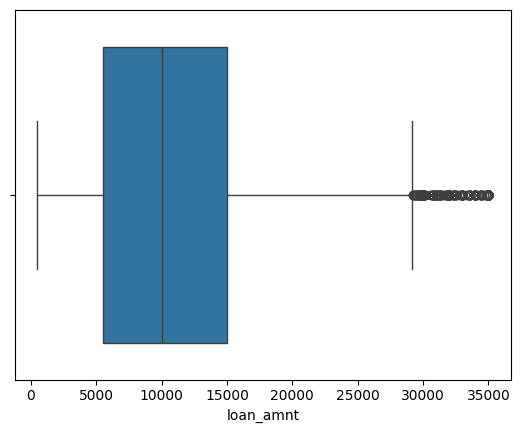

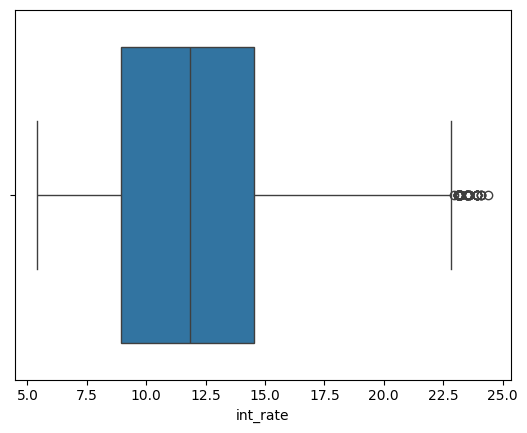

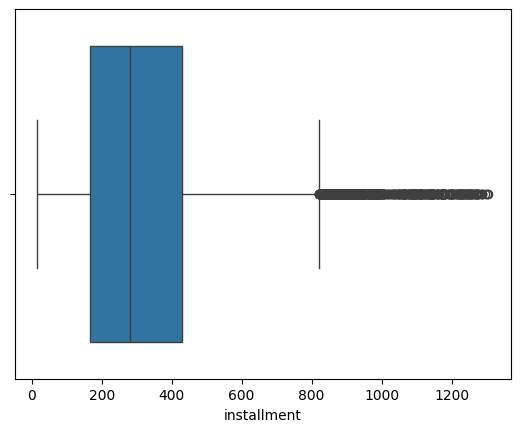

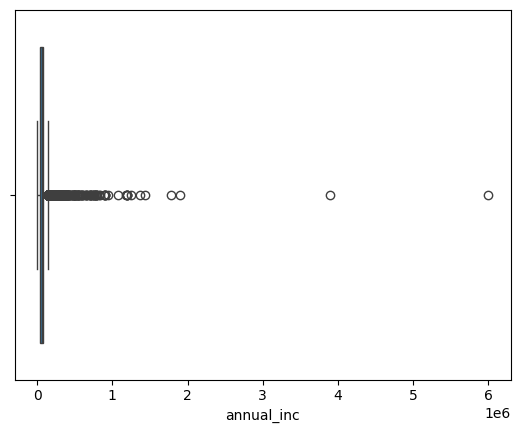

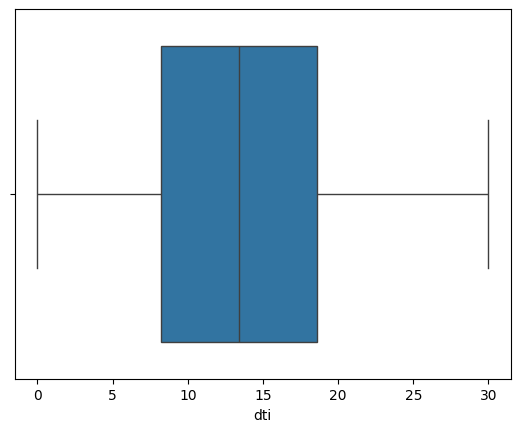

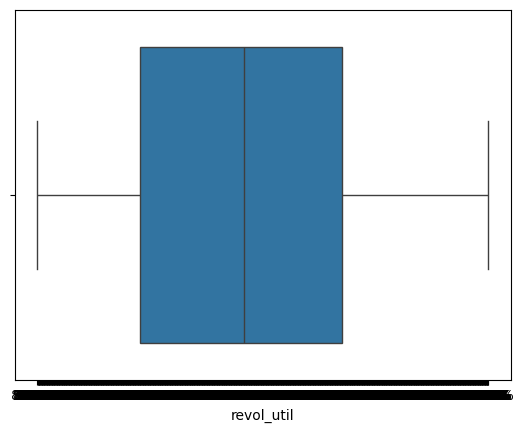

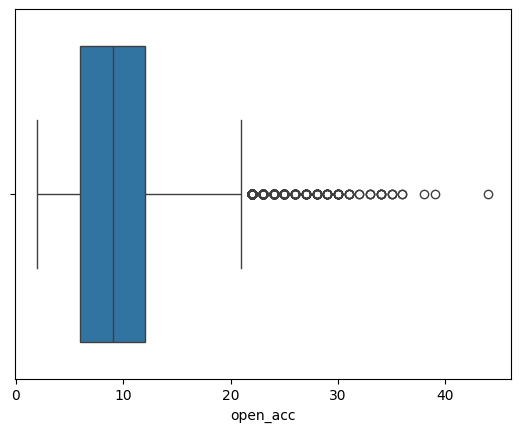

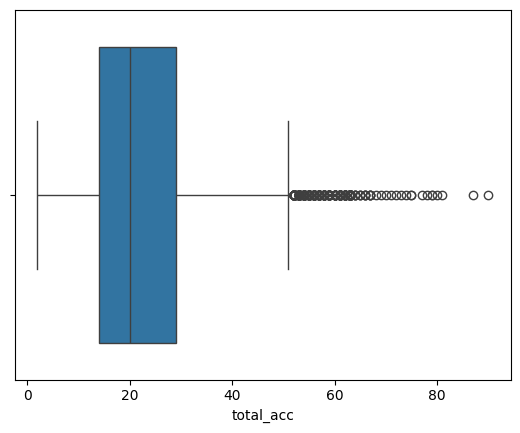

In [524]:
# Check for possible columns with outliers
#
numerical_cols = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_util', 'open_acc', 'total_acc'
]

for col in numerical_cols:
    sns.boxplot(x = data[col])
    plt.show()

loan_amnt       5500.000
int_rate           8.940
installment      167.565
annual_inc     41004.000
open_acc           6.000
total_acc         14.000
Name: 0.25, dtype: float64
loan_amnt      15000.000
int_rate          14.520
installment      428.975
annual_inc     83000.000
open_acc          12.000
total_acc         29.000
Name: 0.75, dtype: float64
percentage of rows removed: 10.46%


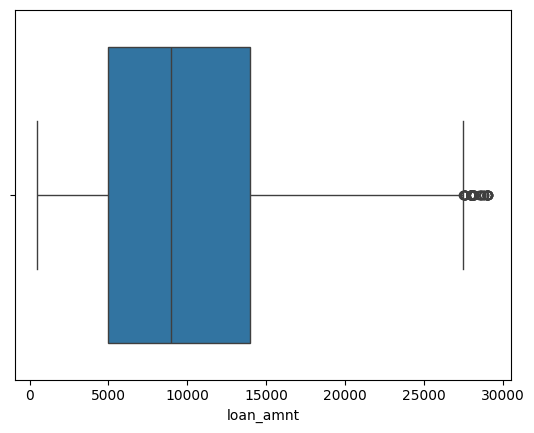

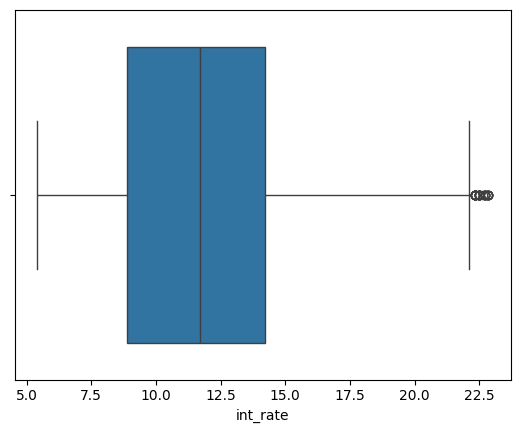

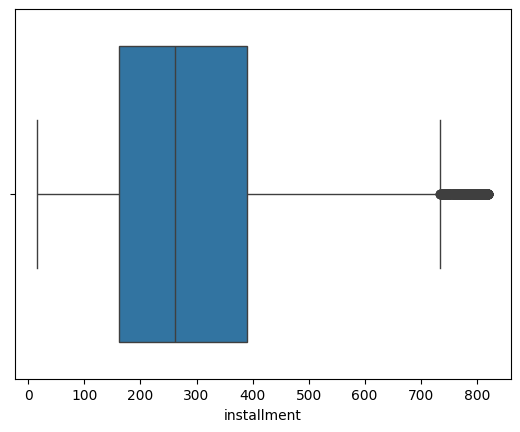

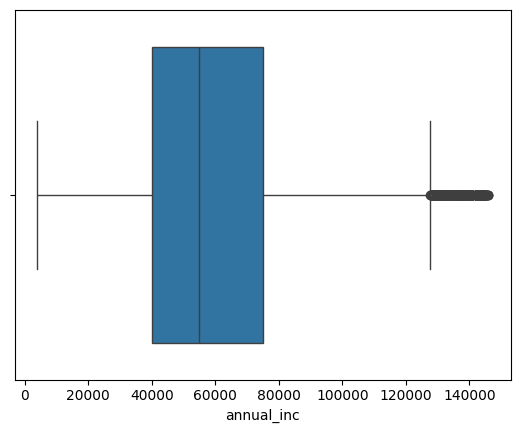

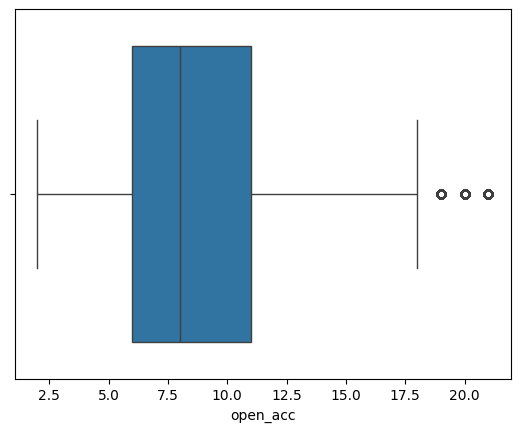

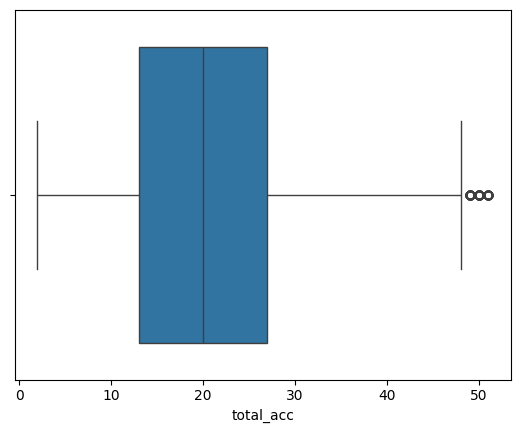

In [525]:
# From the above charts we identify the following columns with squeezed distribution due to outliers.
# Calculate SD 
#Remove values which are away from mean by 2 times SD.

columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'open_acc', 'total_acc']

Q1 = data[columns].quantile(0.25)
Q3 = data[columns].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)

original_len = data.shape[0]
data = data[~((data[columns] < (Q1 - 1.5 * IQR)) |(data[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
new_len = data.shape[0]
percentage = round((original_len - new_len) / original_len * 100, 2)

print("percentage of rows removed: " + str(percentage) + "%")

# Rechecking the plots to see distribution after removal of outliers
#
for col in columns:
    sns.boxplot(x = data[col])
    plt.show()

### Handling Invalid Data

In [526]:
# We will split the date columns as month and year to get more granular insights.
#
columns = ['issue_d', 'earliest_cr_line']

print("Following are the new columns added:")
print("------------------------------------")

for col in columns:
    month_col = str(col) + "_month"
    year_col = str(col) + "_year"

    data[[month_col, year_col]] = data[col].str.split('-', expand = True)
    data[year_col] = data[year_col].apply(lambda x: int(x) + 2000 if int(x) <= 24 else int(x) + 1900)
    
    print(month_col)
    print(year_col)
    
# Drop the original columns
data.drop(columns = columns, axis = 1, inplace = True)

Following are the new columns added:
------------------------------------
issue_d_month
issue_d_year
earliest_cr_line_month
earliest_cr_line_year


In [527]:
# Correcting data types if necessary
data.nunique()

loan_amnt                   786
funded_amnt                 883
funded_amnt_inv            6322
term                          2
int_rate                    324
installment               13134
grade                         7
emp_length                   11
home_ownership                4
annual_inc                 4339
verification_status           3
loan_status                   2
purpose                      14
zip_code                    804
addr_state                   49
dti                        2832
inq_last_6mths                9
open_acc                     20
pub_rec                       5
revol_util                 1080
total_acc                    50
total_rec_late_fee          589
pub_rec_bankruptcies          3
issue_d_month                12
issue_d_year                  5
earliest_cr_line_month       12
earliest_cr_line_year        51
dtype: int64

In [528]:
# Variables with more than 30-40 unique values are counted as numerical.
# Else, categorical.

# Variables where ordering their values does not make sense are Unordered Categorical.
#
unordered_categorical_cols = ['term', 'loan_status', 'addr_state', 'verification_status', 'issue_d_month',
    'home_ownership', 'purpose',  'desc_given', 'total_rec_late_fee_given'
]

# Variables where ordering their values makes sense are Ordered Categorical.
#
ordered_categorical_cols = ['inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 'grade',  
    'issue_d_year', 'emp_length', 'earliest_cr_line_year','earliest_cr_line_month'
]

numerical_cols = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_util', 'open_acc',
    'total_acc'
]

In [529]:
charged_off_df = data[data['loan_status'] == 'Charged Off']
charged_off_df.shape[0]

4682

### Derived Columns

In [530]:
# Bucketting Months to quarters
def get_month_and_quarter(month):
    # Dictionary to map month numbers to month names
    month_dict = {
        1: "Jan", 2: "Feb", 3: "Mar",
        4: "Apr", 5: "May", 6: "Jun",
        7: "Jul", 8: "Aug", 9: "Sep",
        10: "Oct", 11: "Nov", 12: "Dec"
    }
    
    # Determine the month name
    month_name = month_dict.get(month, "Invalid Month")
    
    # Determine the quarter
    if month in [1, 2, 3]:
        return "Q1"
    elif month in [4, 5, 6]:
        return "Q2"
    elif month in [7, 8, 9]:
        return "Q3"
    elif month in [10, 11, 12]:
        return "Q4"
    else:
        return "Invalid Month"

    return f"Month: {month_name}, Quarter: {quarter}"

data['issue_q'] = data.apply(lambda x : get_month_and_quarter(x['issue_d_month']), axis = 1)

In [531]:
data['loan_amnt'].describe()

count    32992.000000
mean      9998.955050
std       6019.255995
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      29100.000000
Name: loan_amnt, dtype: float64

In [532]:
# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
data['loan_amnt_b'] = data.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

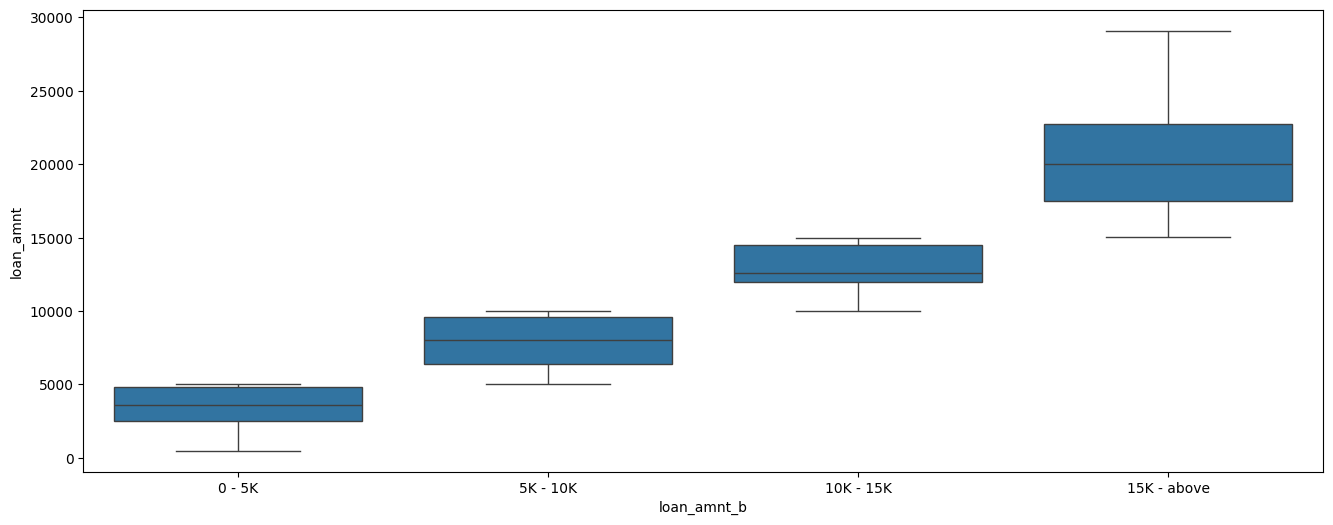

In [533]:
# Validating Categories
plt.figure(figsize=(16,6))
sns.boxplot(y=data.loan_amnt,x=data.loan_amnt_b)
plt.show()

In [534]:
data['funded_amnt_inv'].describe()

count    32992.000000
mean      9386.119096
std       5731.449555
min          0.000000
25%       5000.000000
50%       8074.715000
75%      12775.000000
max      29075.000000
Name: funded_amnt_inv, dtype: float64

In [535]:
# Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'    
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

data['annual_inc_b'] = data.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [536]:
data['int_rate'].describe()

count    32992.000000
mean        11.773336
std          3.586995
min          5.420000
25%          8.900000
50%         11.710000
75%         14.220000
max         22.850000
Name: int_rate, dtype: float64

In [537]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'    
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile
    
data['int_rate_b'] = data.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

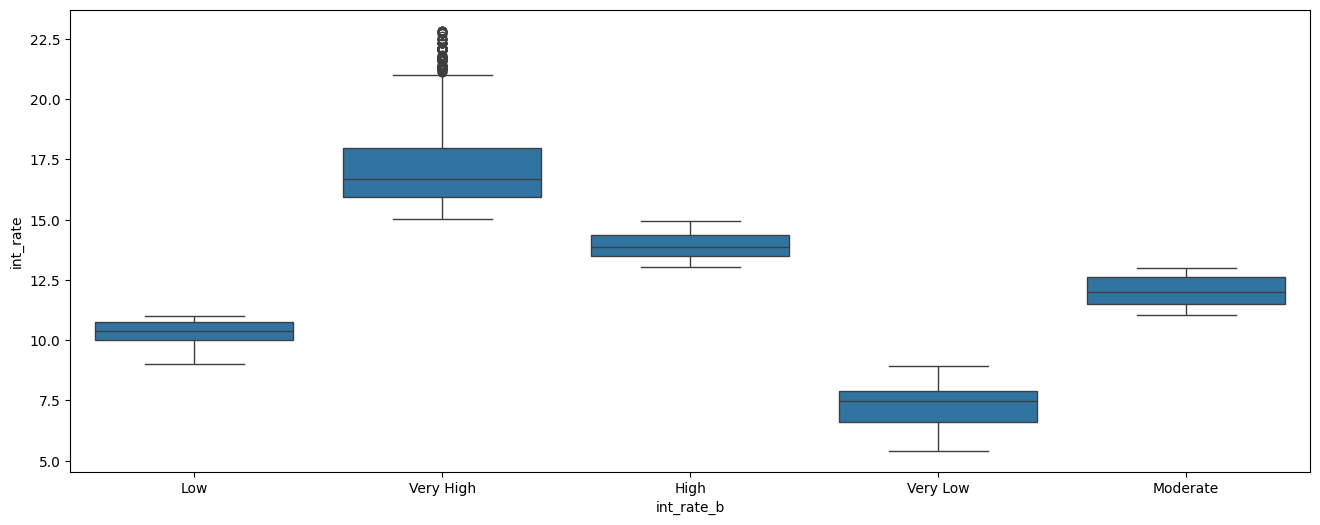

In [538]:
# Validating Categories
plt.figure(figsize=(16,6))
sns.boxplot(y=data.int_rate,x=data.int_rate_b)
plt.show()

### Data Post Cleanup

In [539]:
# Printing column info to analyse missing values, empty values in a column
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32992 entries, 0 to 39680
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               32992 non-null  float64
 1   funded_amnt             32992 non-null  float64
 2   funded_amnt_inv         32992 non-null  float64
 3   term                    32992 non-null  int64  
 4   int_rate                32992 non-null  float64
 5   installment             32992 non-null  float64
 6   grade                   32992 non-null  object 
 7   emp_length              32992 non-null  float64
 8   home_ownership          32992 non-null  object 
 9   annual_inc              32992 non-null  float64
 10  verification_status     32992 non-null  object 
 11  loan_status             32992 non-null  object 
 12  purpose                 32992 non-null  object 
 13  zip_code                32992 non-null  object 
 14  addr_state              32992 non-null  obj

In [540]:
data.shape

(32992, 31)

In [541]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'total_rec_late_fee', 'pub_rec_bankruptcies',
       'issue_d_month', 'issue_d_year', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'issue_q', 'loan_amnt_b', 'annual_inc_b',
       'int_rate_b'],
      dtype='object')

## Univeriate Analysis

In [542]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income', 
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_d_year': 'Issue Year',
    'issue_d_month': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

### Common Functions


In [544]:
# This function creates a dictionary of outliers which includes the inter quartile range, 
# lower and upper bound for a particular column.
# Formulae used in this analysis
# IQR = 75th Quartile - 25th Quartile
# Lower Bound = 25th Quartile - 1.5 * IQR
# Upper Bound = 75th Quartile + 1.5 * IQR

iqr_multiplier = 1.5

def get_iqr(df, column):
    quar25 = df[column].quantile(0.25)
    quar75 = df[column].quantile(0.75)
    iqr = quar75 - quar25
    lower = quar25 - iqr_multiplier * iqr
    upper = quar75 + iqr_multiplier * iqr
    return {'quartile1': quar25, 'quartile3': quar75, 'iqr': iqr, 'lower_bound': lower, 'upper_bound': upper}


# The function treat outliers, prints a box plot for each column under consideration
# Plot 1 = Before outlier treatment
# Plot 2 = Post outlier treatment
# Also prints statistics of how many rows and percentage of rows dropped
def outlier_comparison(df, column):
    # box plot before dropping outliers
    fig, p = plt.subplots(1,2,figsize=(14, 3))
    splot1 = sns.boxplot(df[column], ax=p[0], orient="h")
    splot1.set_title('Plot ['+ column + '] - Original')
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    # box plot after dropping outliers    
    splot2 = sns.boxplot(new_df[column], ax=p[1])
    splot2.set_title('Plot [' + column + '] - Post Outlier Treatment')
    plt.tight_layout()
    plt.show()
    
def drop_outlier(df, column):
    old_rows = len(df)
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    new_rows = len(new_df)
    print('Rows dropped: ', old_rows - new_rows)
    print('Percentage rows dropped: ', round((old_rows - new_rows)/old_rows*100,2), "%")
    return new_df


def calculate_charged_off_percentage(group):
    total_count = len(group)
    filtered_count = len(group[group['loan_status'] == 'Charged Off'])  # Apply the desired filter
    percentage = filtered_count / total_count * 100
    return percentage

def charged_off_dist_plots(col, figsize = (8, 5), vertical = False):
    # Determine grid
    rows = 1
    cols = 2
    
    if vertical:
        rows = 2
        cols = 1
    
    # Plot univariate distribution
    fig, axes = plt.subplots(rows, cols, figsize = figsize)
    
    # Group by column
    df_grouped = data.groupby(col).size().reset_index(name = 'total')
    charged_off_df_grouped = charged_off_df.groupby(col).size().reset_index(name = 'charged off')

    # Merge two df groups into one
    df_merged = pd.merge(df_grouped, charged_off_df_grouped, on = col, how = 'outer')
    df_merged['charged off'].fillna(0, inplace = True)
    df_merged = df_merged.sort_values(by = 'total')

    # Plot the dataframe
    df_merged.plot(x = col, y = 'total', kind = 'bar', ax = axes[0], colormap = 'Paired')
    df_merged.plot(x = col, y = 'charged off', kind = 'bar', ax = axes[0], stacked = True)
    axes[0].set_title("Count Distribution for " + col)

    # Plot % of distribution in each segment
    grouped = data.groupby(col).apply(calculate_charged_off_percentage).sort_values()
    grouped.plot(kind = 'bar', ax = axes[1])
    axes[1].set_title("Charged Off % for " + col)
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Percentage')

    fig.tight_layout()
    fig.show()

def univariate_analysis(df, column):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.histplot(df.loc[df[column].notnull(), column], kde=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plt.tight_layout()
    plt.show()


In [545]:
# Bivariate analysis of columns against loan_status and calculate the ratio of Charge Offs
def analysis_vs_loan_status(df, col):
    fig, p = plt.subplts(1,2, figsize=(16, 4))
    splt = sns.countplt(df[col], ax=p[0])
    splt.set_xticklabels(splt.get_xticklabels(), rotation=90);
    p[0].set_title('['+ col + '] - loan_status=all')
    cross_tab = pd.crosstab(df[col], df['loan_status'], normalize='index')
    cross_tab.plt.bar(ax=p[1], stacked=True)
    p[1].set_title('['+ col + '] - Stacked')
    plt.show()


def continious_column_analysis(df, column):
    f, (ax1, ax2) = plt.subplts(nrows=1, ncols=2, figsize=(16,4))
    sns.distplt(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=ax1)
    sns.boxplt(x=column, y='loan_status', data=df, ax=ax2)
    ax1.set_xlabel(column_titles[column])
    ax2.set_xlabel(column_titles[column] + 'by Loan Status')
    plt.tight_layout()
    plt.show()
    # return group by dataframe for display comparison
    return df.groupby('loan_status')[column].describe()

def comparison_loan_status(df, column):
    df.groupby('loan_status')[column].value_counts().unstack().plt(kind='bar', figsize=[16,4])
    plt.show()


def ratio_wise(df, column):
    rw = df.pivot_table(index=column, columns='loan_status', values='loan_amnt', aggfunc=len).reset_index()
    rw['total'] = rw['Charged Off'] + rw['Fully Paid']
    rw['charge_off_ratio'] = round(rw['Charged Off'] / rw['total'] * 100)
    rw.sort_values(by='total', ascending=False)
    return rw

def ratio_wise_plot(df, column, invert=False):
    plt.figure(figsize=[10,4])
    plt.title('Charged Off : ' + column_titles[column])
    rw = ratio_wise(df, column)
    if invert:
        sns.barplot(x=rw['charge_off_ratio'], y=rw[column],data=df)
    else:
        sns.barplot(x=rw[column],y=rw['charge_off_ratio'],data=df)
    plt.tight_layout()
    plt.show()
    return rw

def series_plt(df, column, hue=None, annot=1):
        temp = pd.Series()
        fig, ax = plt.subplots(figsize=(20,14))
        width = len(df[column].unique()) + 6 + 4 * len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x=column, order=df[column].value_counts().index, hue=hue) 
        if annot == 1:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
        elif annot == 2:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
        plt.show()

## Charged Off Distribution Plots Analysis

### UnOrdered Categorical Variables

C:\Users\venkatesh.gaddam\AppData\Local\Temp\ipykernel_32264\2196913171.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['charged off'].fillna(0, inplace = True)
C:\Users\venkatesh.gaddam\AppData\Local\Temp\ipykernel_32264\2196913171.py:77: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly selec

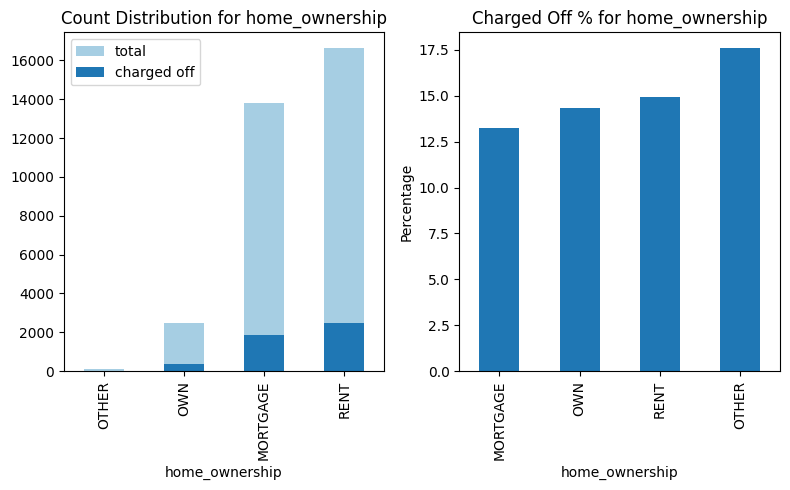

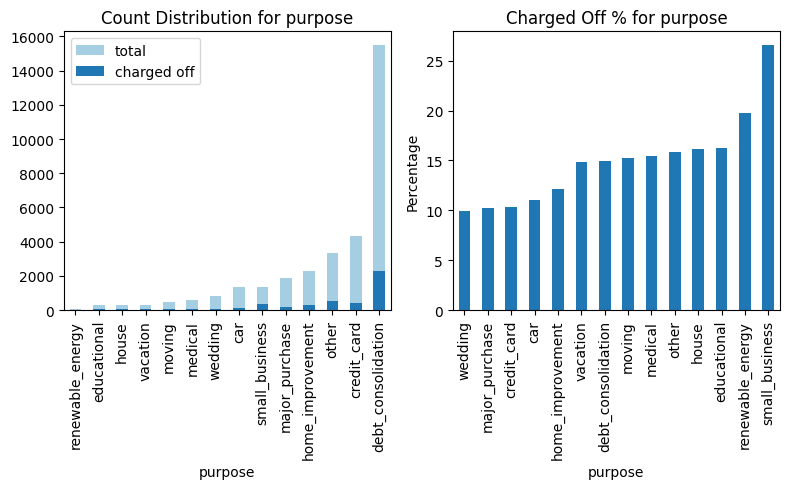

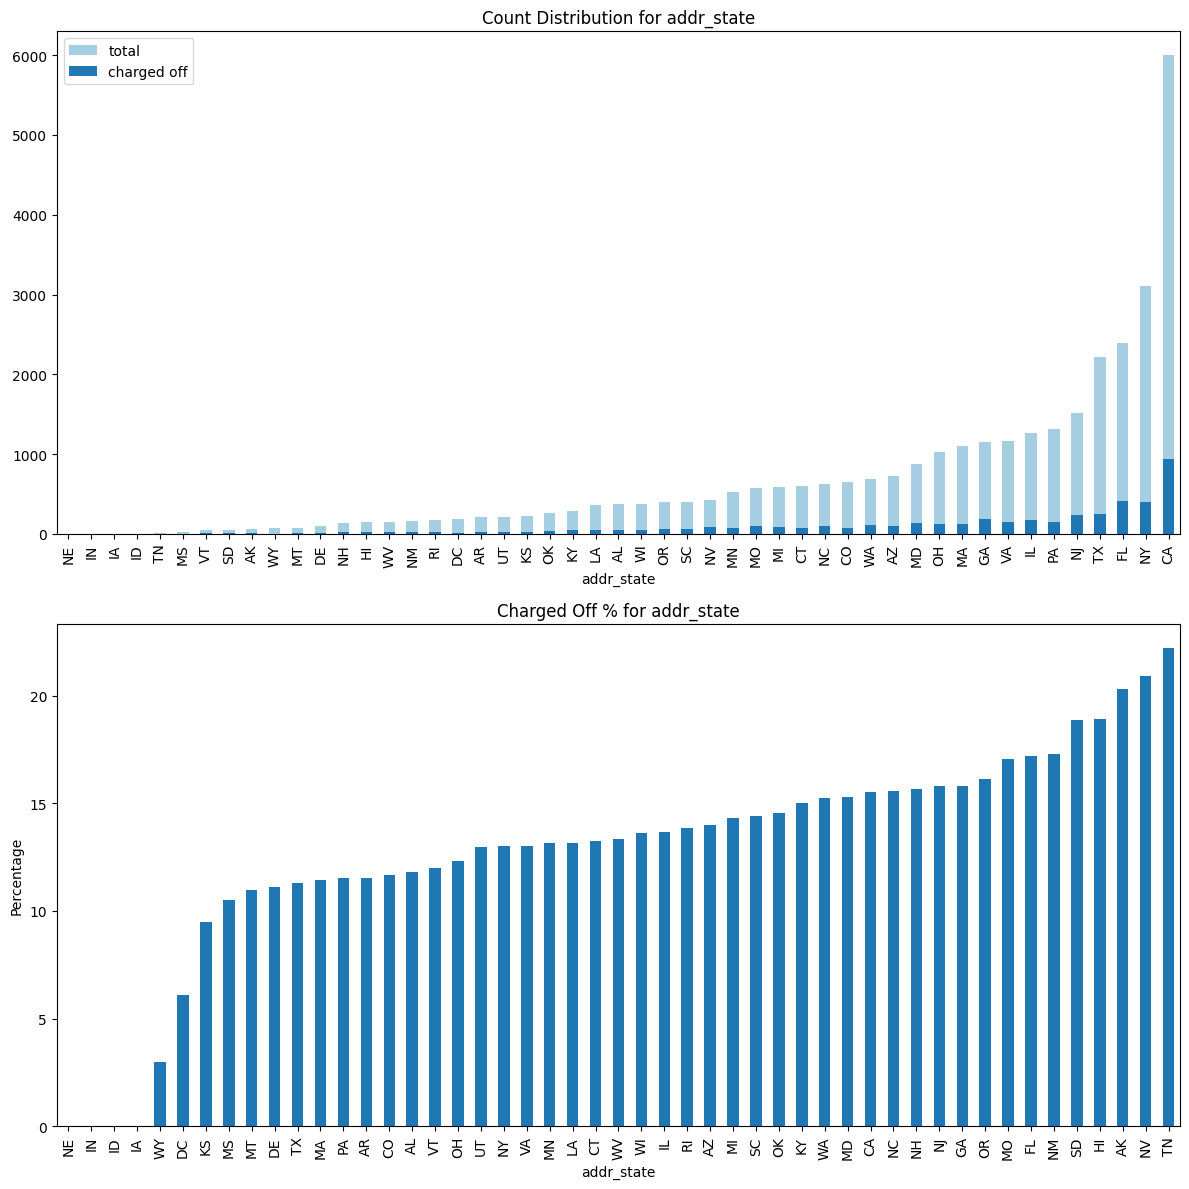

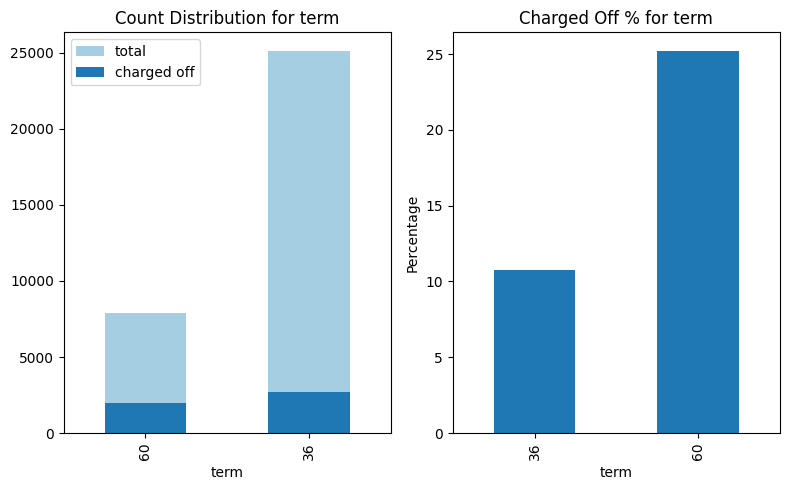

In [546]:
cols=['home_ownership','purpose','addr_state','term']

for col in cols:
    if col=='addr_state':
        charged_off_dist_plots(col, figsize = (12, 12), vertical = True)
    else:
        charged_off_dist_plots(col)

### Insights
- Rent and Mortgage give almost similar business but Mortgage has less default percentage.
- Small business are having high default rate.
- Defaults rate for NY is less than 15% while CA goes above 15%.
- There are almost thrice more loan takers for the term of 36 months with 15% less defaulters than 60 months term.
- State CA has high number of loan applications.

**Conclusion**:
- Mortgage seems profitable.
- Avoid giving loan to small businesses.
- NY is a better state for profitability than CA. AK, NV, SD, TN states should be avoided to issue loans due to very high default rate.
- April has highest default percentage while giving least customers.
- Giving out loan for a term of 36 months seems far more profitable.


### Ordered Categorical Variable Analysis

C:\Users\venkatesh.gaddam\AppData\Local\Temp\ipykernel_32264\2196913171.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['charged off'].fillna(0, inplace = True)
C:\Users\venkatesh.gaddam\AppData\Local\Temp\ipykernel_32264\2196913171.py:77: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly selec

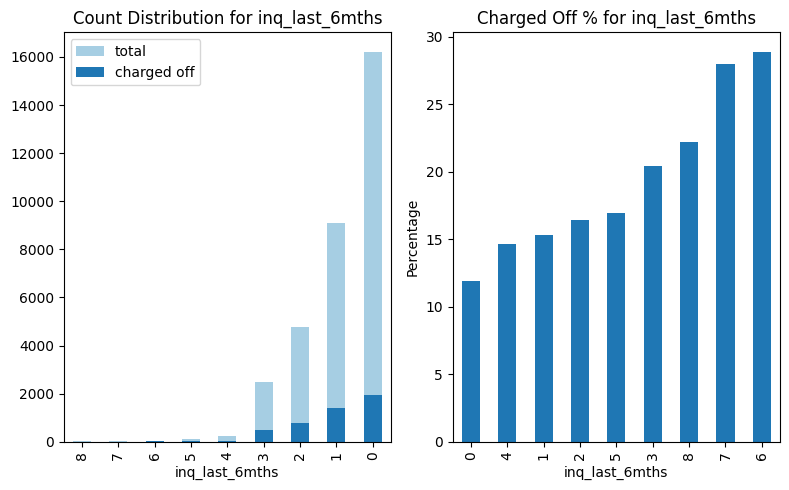

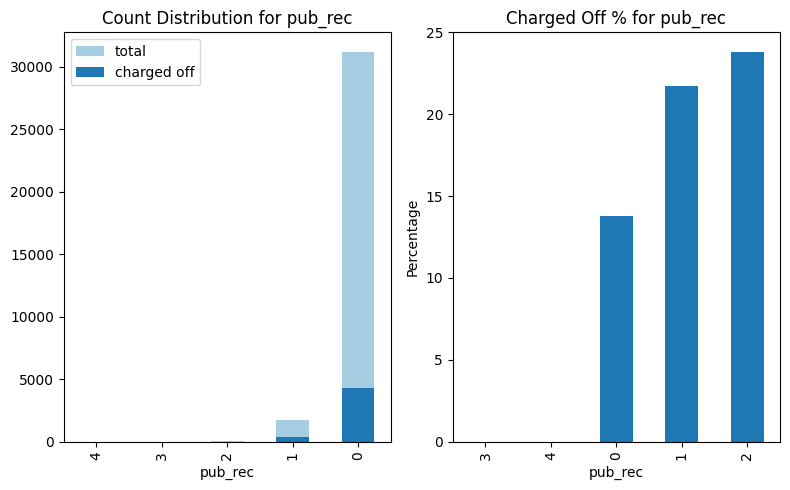

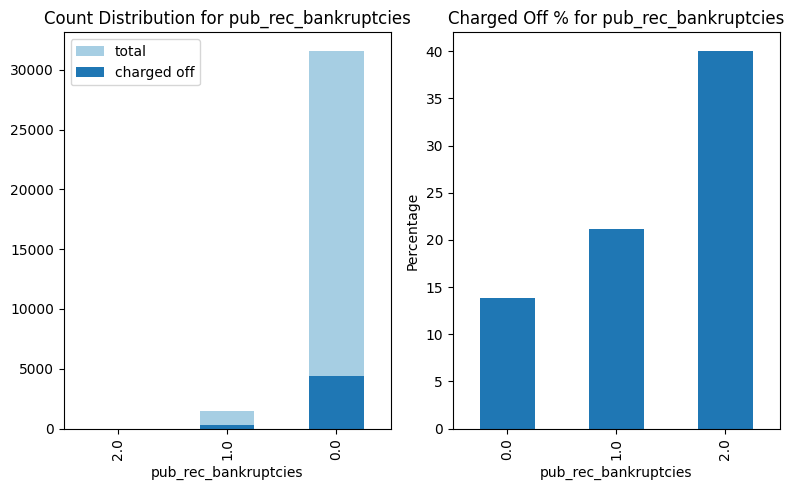

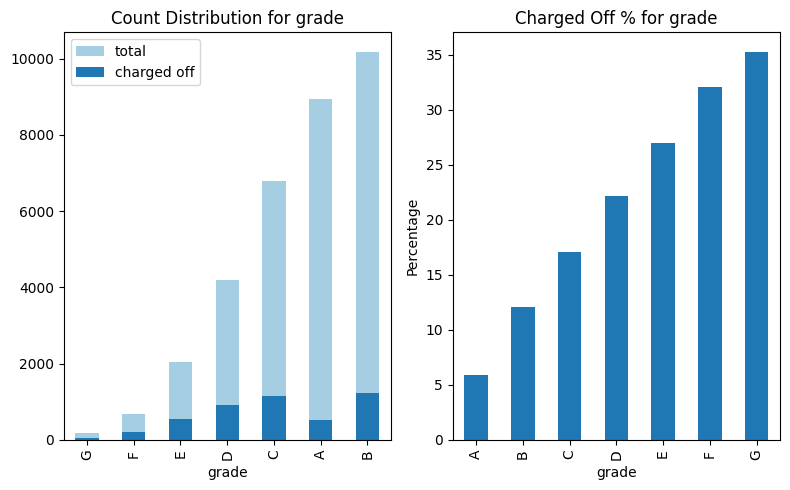

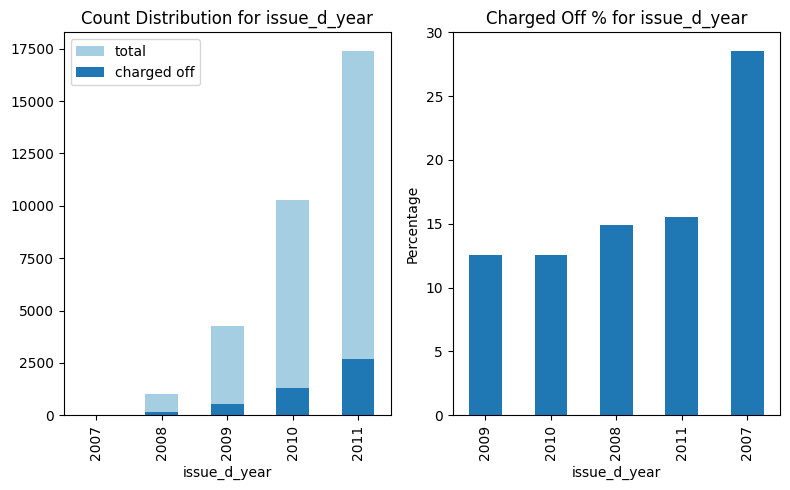

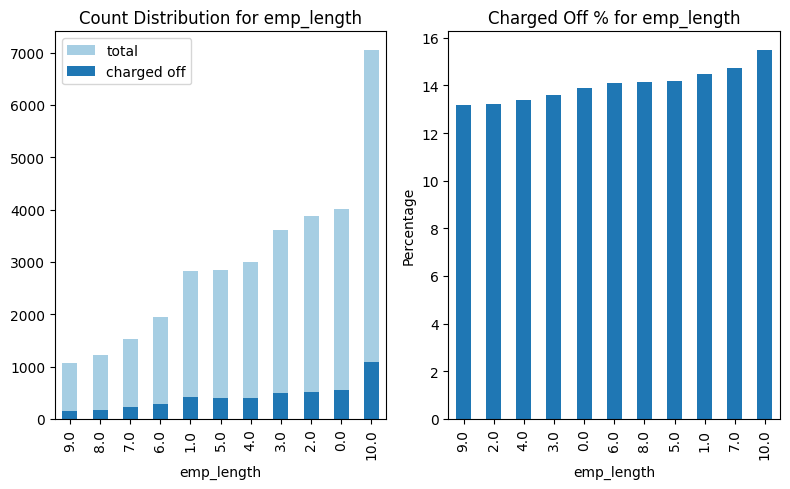

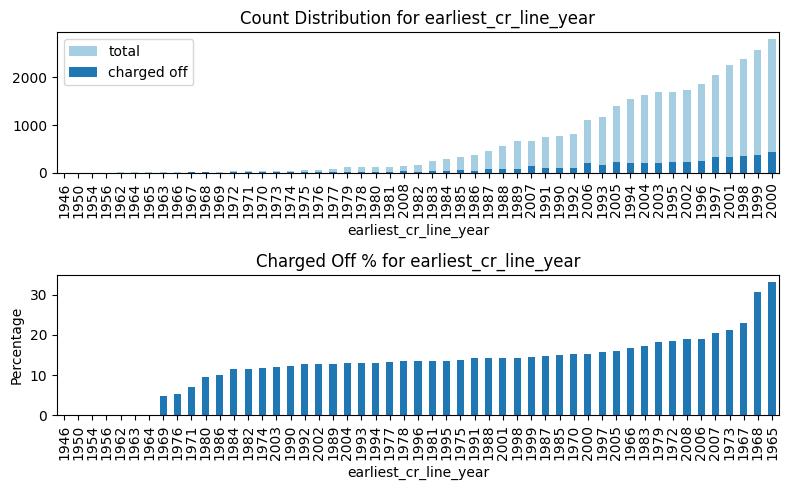

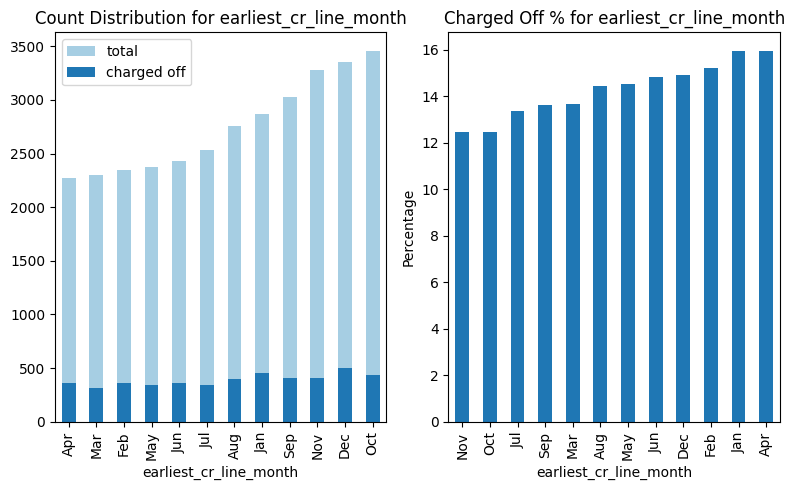

In [547]:
for col in ordered_categorical_cols:
    if col == 'sub_grade' or col == 'earliest_cr_line_year':
        charged_off_dist_plots(col, vertical = True)
    else:
        charged_off_dist_plots(col)

### Insights

**Column: Inquiries in past 6 months**
- There are large number of loan takers for which least number of inquiries are made.
- Percentage of defaulters is high for higher number of inquiries.

**Analysis:**
- Very less number of defaulters where none or only one inquiry is made.

**Column: Public records and Bankruptcies**
- Almost 25% default rate where there is atleast 1 public record or recorded bankruptcies.

**Analysis:**
- Issue loans only to those with no public records or bankruptcies.

**Column: Loan Grade**
- As grade of loan increases, percentage of defaulters go higher.

**Analysis:**
- Do not issue loans of D E F G categories, they have over 20% default rate.

**Column: Issue Year**
- Highest default rate in 2007

**Analysis:**
- This would be due to the Global financial crises.

**Column: Employement Length**
- Highest default rate with length of 4 years.

**Analysis:**
- This would be due to high expenses in other factors in life such as marriage, house buying, car etc.

**Column: Earliest Credit Line Year**
- Charged Off % is high in 1965.

**Column: Earliest Credit Line Month**
- April has highest default percentage while giving least customers.

## Quantitative Variable Analysis

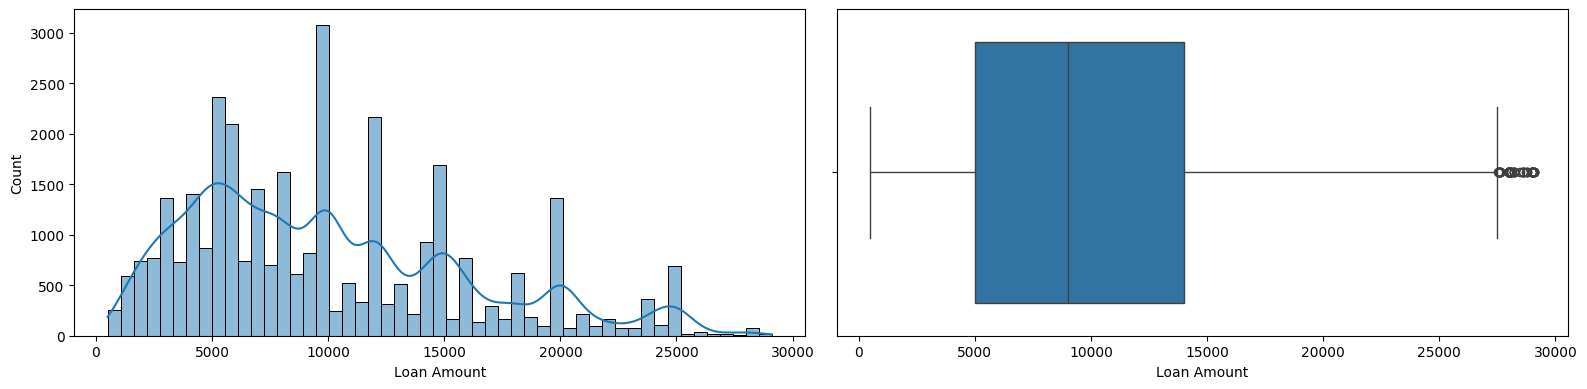

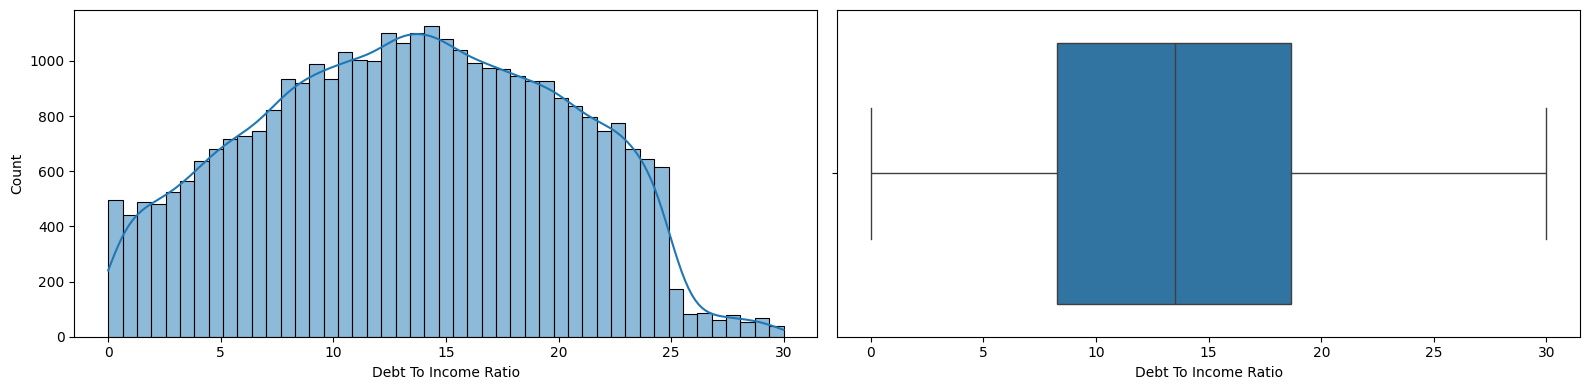

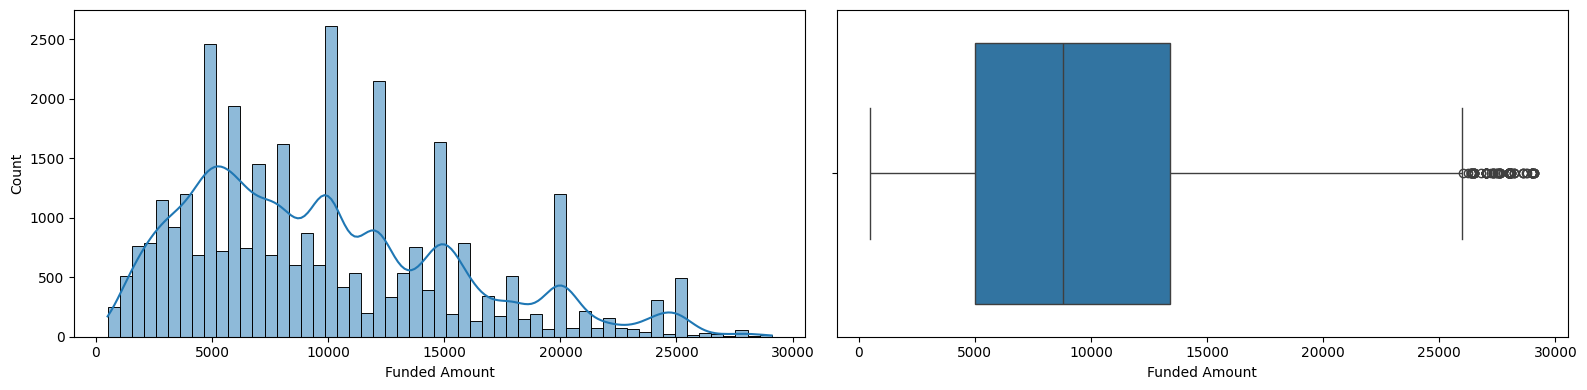

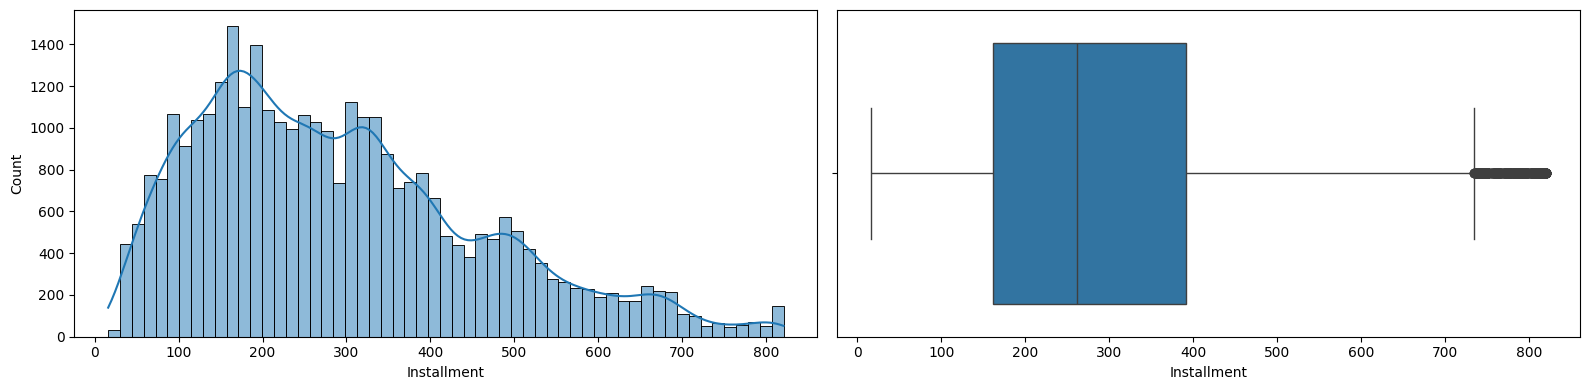

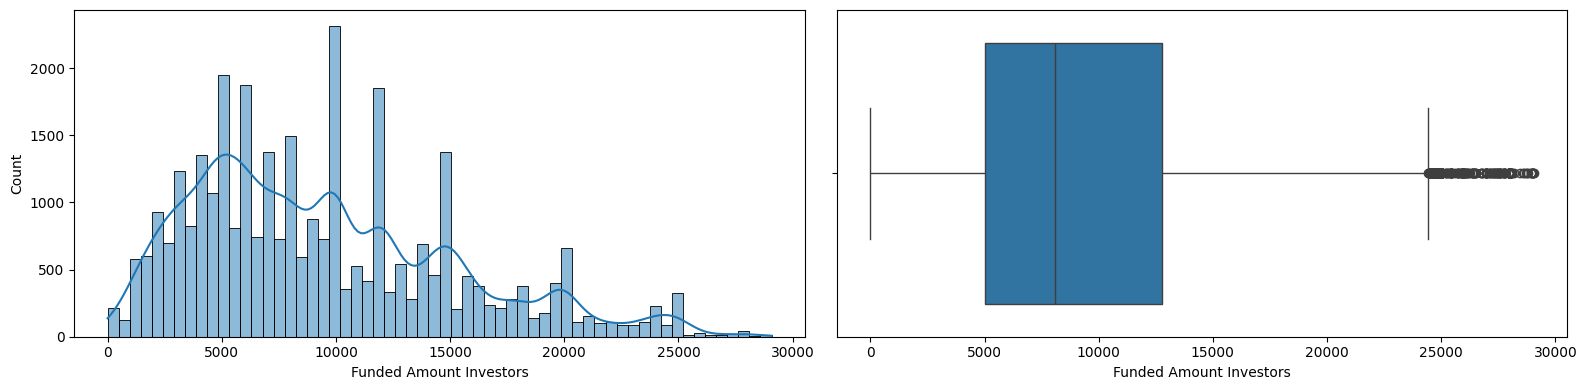

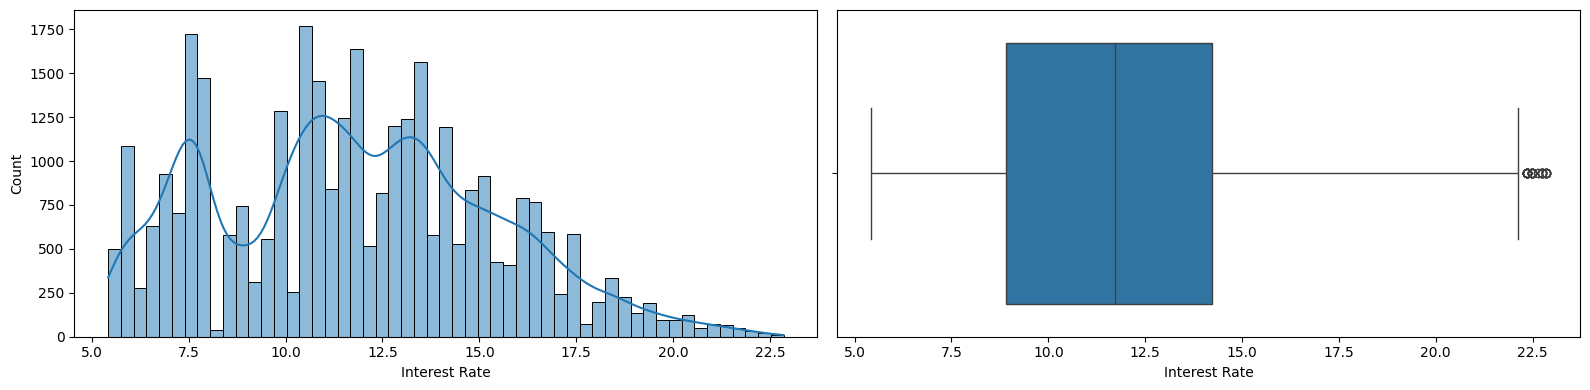

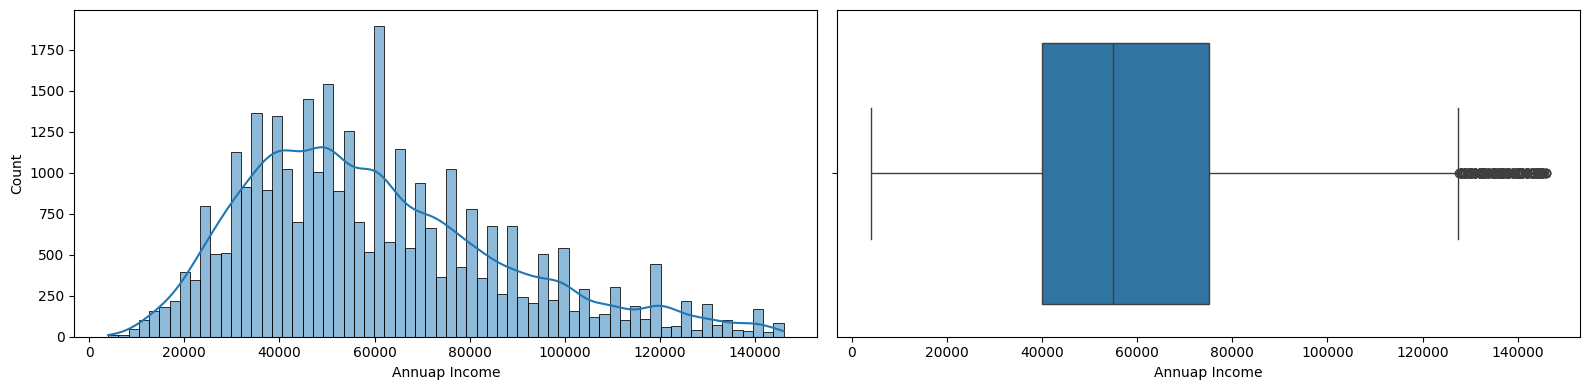

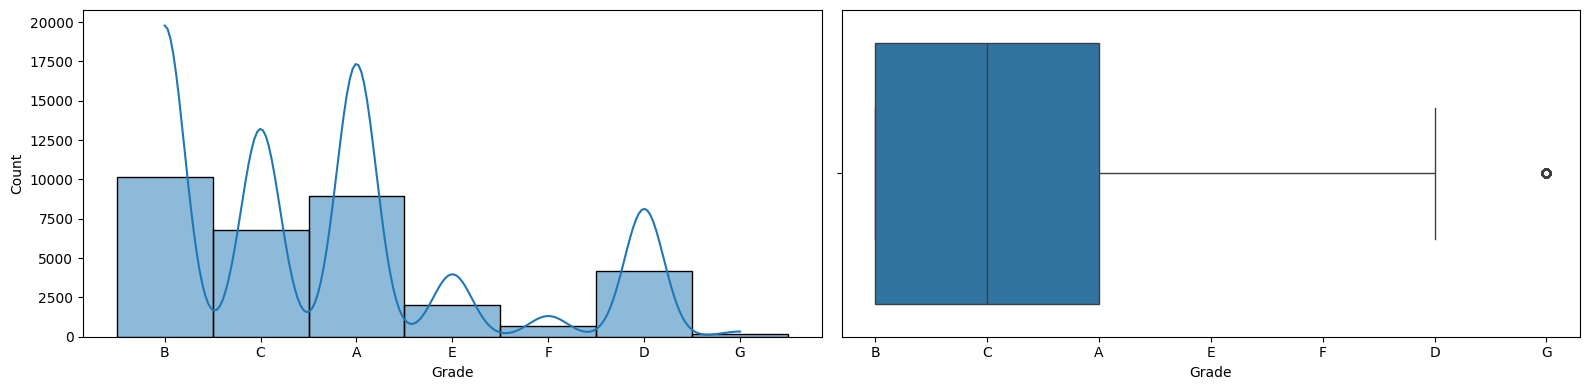

In [548]:
quantitative_cols=['loan_amnt','dti','funded_amnt','installment','funded_amnt_inv','int_rate','annual_inc','grade']
for col in quantitative_cols:
    univariate_analysis(data,col)

## Insights

- Majority of the loan_amount is in the range of 5K to 14K
- Majority of the fund_amount is in the range of 5K to 14K
- Majority of the installments are in the range of 20 to 400
- Majority of the fund_amount is in the range of 5K to 12K
- Majority of the interest rate is  5-15%
- Max interest rate is 22.5%
- Majority of the income is in  4K & 60K
- Max Annual income is 145000
- Majority of the Loan applications fall under Grade-B

## Unordered Categorical Variable Analysis

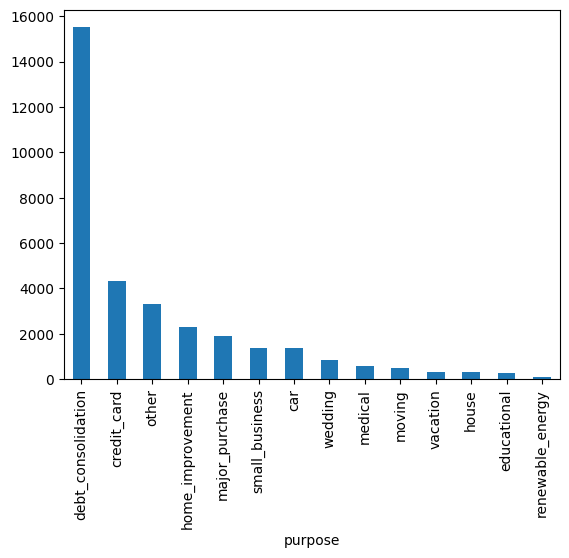

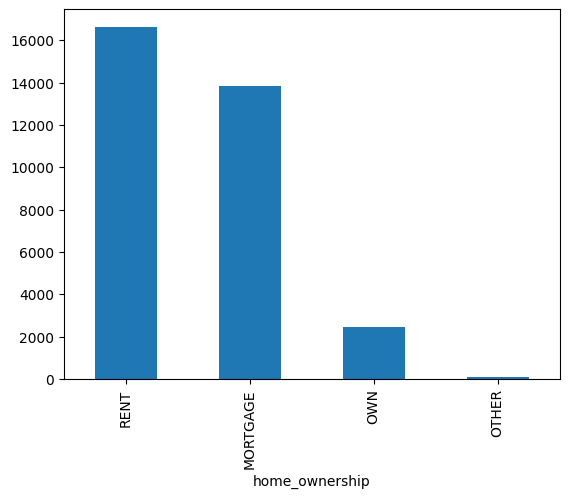

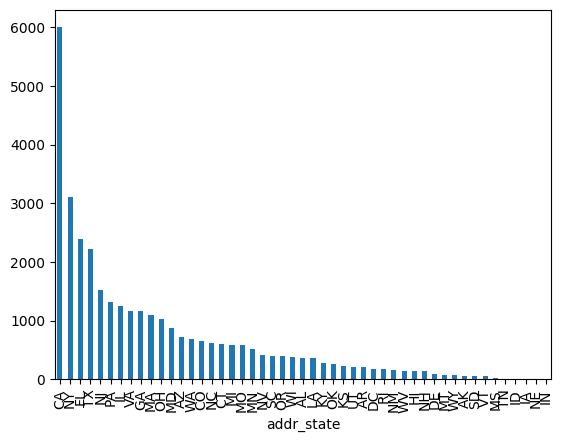

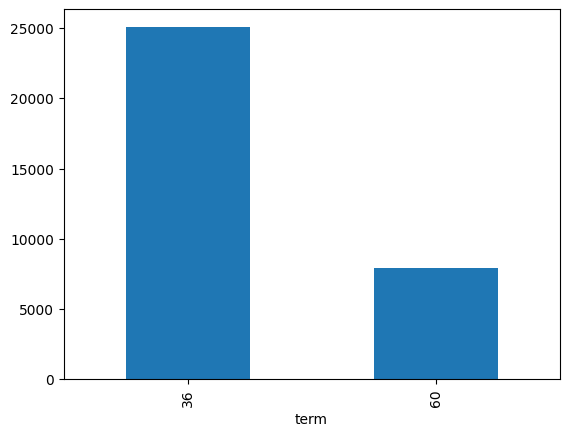

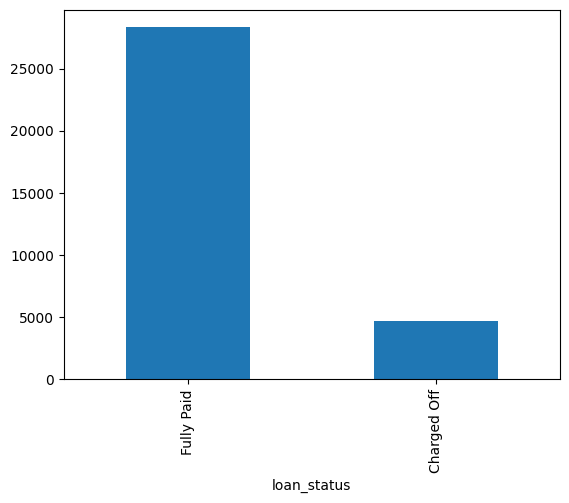

In [549]:
unordered=['purpose','home_ownership','addr_state','term','loan_status']

for col in unordered:
    data[col].value_counts().plot.bar()
    plt.show()

#data['home_ownership'].value_counts().plot.bar()

## Ordered Categorical Variable Analysis

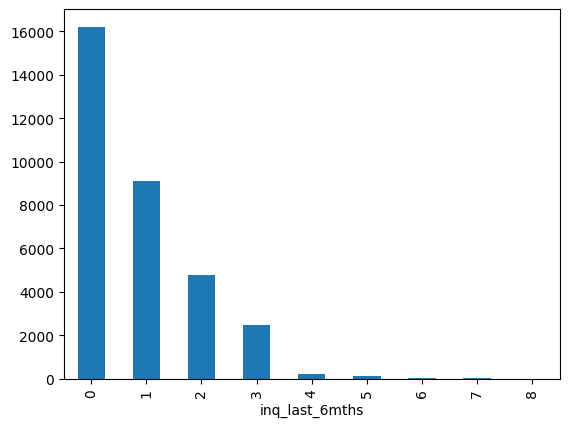

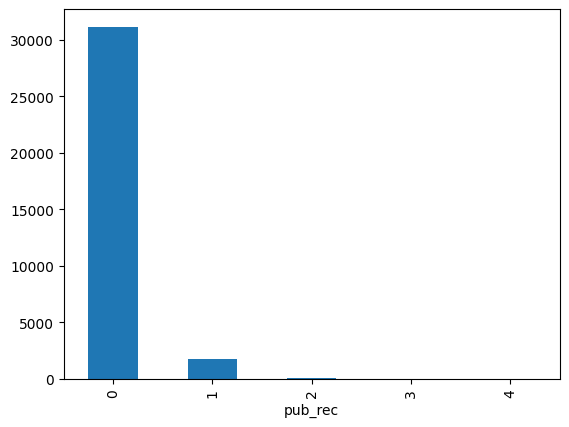

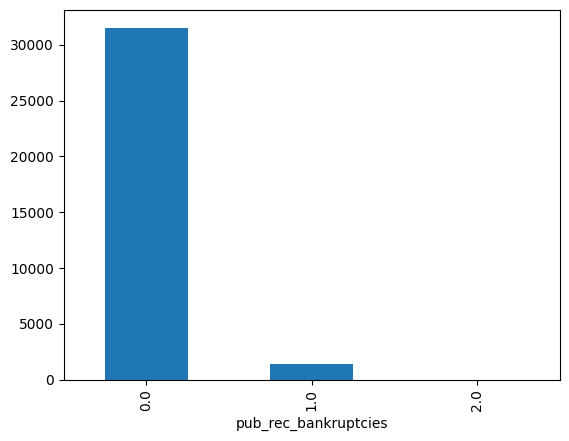

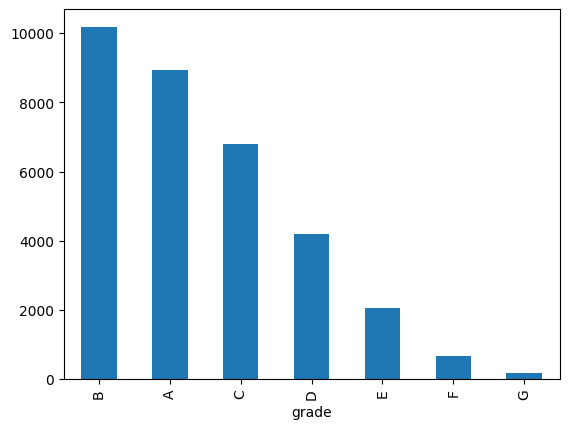

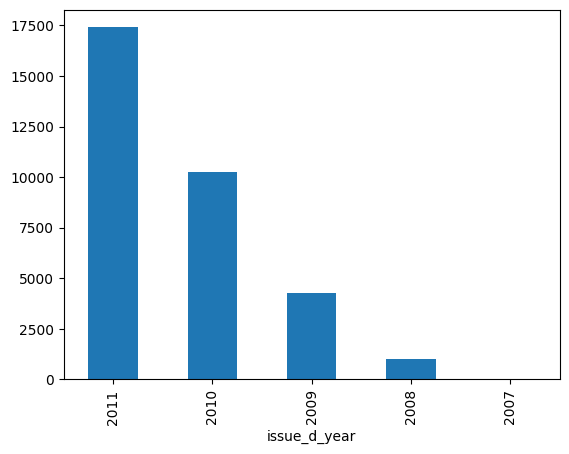

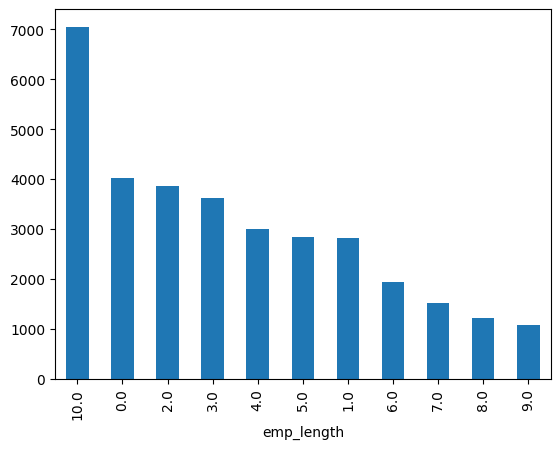

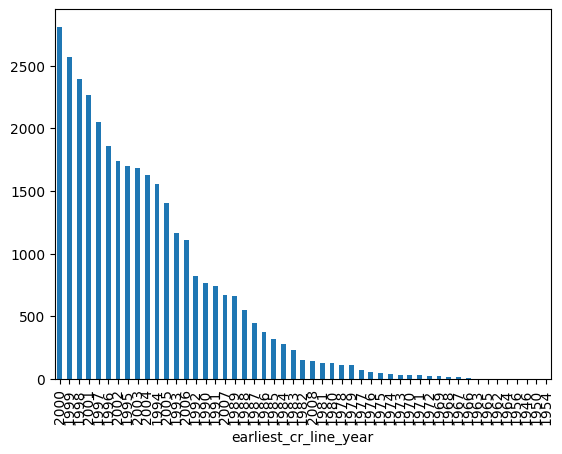

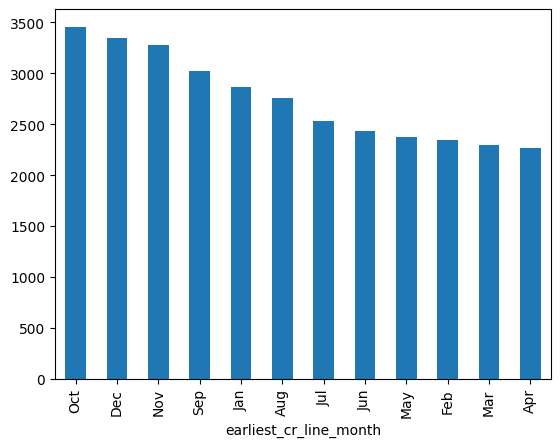

In [550]:
for col in ordered_categorical_cols:
    data[col].value_counts().plot.bar()
    plt.show()

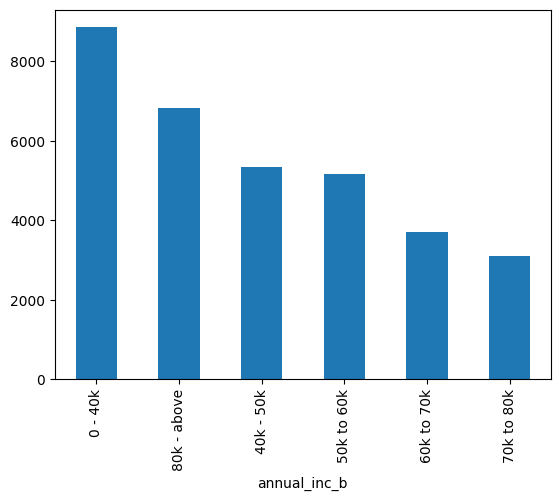

In [551]:
data['annual_inc_b'].value_counts().plot.bar()
plt.show()

# Univarite Analysis Summary

### Customer Demographics
- Majority of the loan applicants are in the range of 0 - 40K annual income
- Majority of the home owner status are in status of RENT and MORTGAGE
- Highest loan applications are in the category of debt_consolidation
- Majority of the employment length of the customers are 10+ years and then in the range of 0-2 years

### Loan Demographics
- Highest loan amount applications fall in the range of 5k to 10k
- Majority of the interest rate is in the range of 5% to 16% going at the max to 22%
- Majority of the installment amount is in the range of 20$ to 400$
- Majority of the loan applications counts are in the term of 36 months
- Majority of loan application counts fall under the catogory of Grade B

### Time Based Analysis
- Loan application counts are increasing year over year.

### Inferences
- The customer demographic data shows which segment of customers to target for highest volume of loan
- Indicates more analysis is needed why other categories are not as high as other few
- Indicates the LendingClub to be prepared with volume in Q4
- Indicates the LendingClub to target customers in other quarters to increase sales

In [552]:
# Printing column info to analyse missing values, empty values in a column
print(data.info())
data.head()
# Taking a data snapshot
#data.to_csv('snapshot.loan.csv') 

<class 'pandas.core.frame.DataFrame'>
Index: 32992 entries, 0 to 39680
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               32992 non-null  float64
 1   funded_amnt             32992 non-null  float64
 2   funded_amnt_inv         32992 non-null  float64
 3   term                    32992 non-null  int64  
 4   int_rate                32992 non-null  float64
 5   installment             32992 non-null  float64
 6   grade                   32992 non-null  object 
 7   emp_length              32992 non-null  float64
 8   home_ownership          32992 non-null  object 
 9   annual_inc              32992 non-null  float64
 10  verification_status     32992 non-null  object 
 11  loan_status             32992 non-null  object 
 12  purpose                 32992 non-null  object 
 13  zip_code                32992 non-null  object 
 14  addr_state              32992 non-null  obj

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0     5000.0       5000.0           4975.0    36     10.65       162.87     B   
1     2500.0       2500.0           2500.0    60     15.27        59.83     C   
2     2400.0       2400.0           2400.0    36     15.96        84.33     C   
3    10000.0      10000.0          10000.0    36     13.49       339.31     C   
5     5000.0       5000.0           5000.0    36      7.90       156.46     A   

   emp_length home_ownership  annual_inc  ... total_rec_late_fee  \
0        10.0           RENT     24000.0  ...               0.00   
1         0.0           RENT     30000.0  ...               0.00   
2        10.0           RENT     12252.0  ...               0.00   
3        10.0           RENT     49200.0  ...              16.97   
5         3.0           RENT     36000.0  ...               0.00   

  pub_rec_bankruptcies issue_d_month issue_d_year earliest_cr_line_month  \
0                  0.0           Dec         2011                    Jan   
1                  0.0           Dec         2011                    Apr   
2                  0.0           Dec         2011                    Nov   
3                  0.0           Dec         2011                    Feb   
5                  0.0           Dec         2011                    Nov   

   earliest_cr_line_year        issue_q  loan_amnt_b  annual_inc_b int_rate_b  
0                   1985  Invalid Month       0 - 5K       0 - 40k        Low  
1                   1999  Invalid Month       0 - 5K       0 - 40k  Very High  
2                   2001  Invalid Month       0 - 5K       0 - 40k  Very High  
3                   1996  Invalid Month     5K - 10K     40k - 50k       High  
5                   2004  Invalid Month       0 - 5K       0 - 40k   Very Low  

[5 rows x 31 columns]

## Bivariate Analysis

### Analysis v/s Charged Off

In [553]:
print(data.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'total_rec_late_fee', 'pub_rec_bankruptcies',
       'issue_d_month', 'issue_d_year', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'issue_q', 'loan_amnt_b', 'annual_inc_b',
       'int_rate_b'],
      dtype='object')


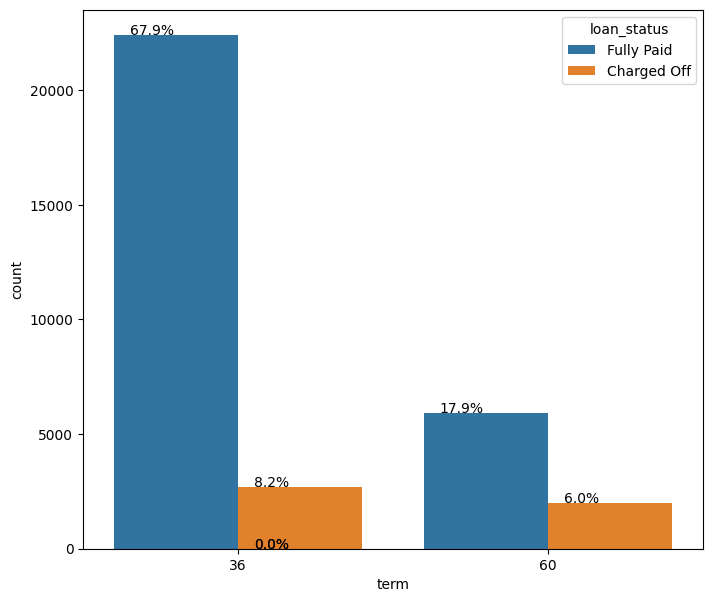

In [554]:
# Overall ratio of Charge Offs
series_plt(data, 'term', 'loan_status')

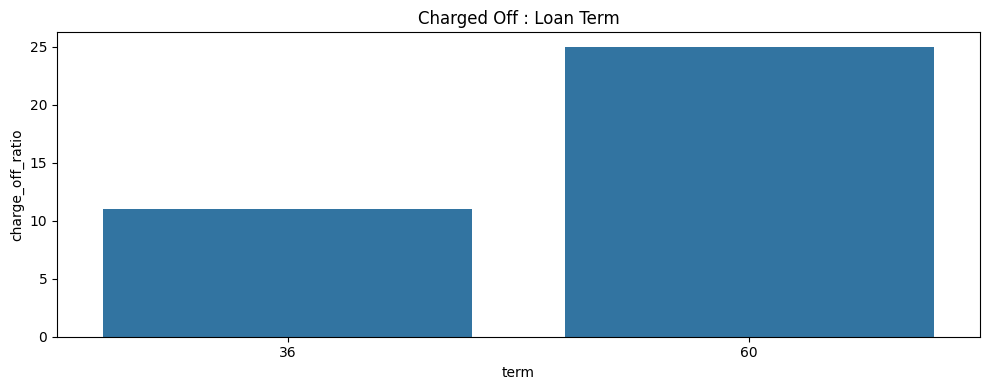

loan_status  term  Charged Off  Fully Paid  total  charge_off_ratio
0              36         2691       22393  25084              11.0
1              60         1991        5917   7908              25.0

In [555]:
# Drop the first column
#data = data.iloc[:, 1:]
if 'Id' not in data.columns:
    data['id'] = range(1, len(data) + 1)
ratio_wise_plot(data, 'term')

***
- The volume of loans are in the category of term = 36
- The overall percentage of Charge Off's is slightly higher in term = 36 (8%) as compared to term=60 (6%)
- If we calculate the ratio of Charge Off's within a category
    - **Charge Off**s ratio is for the term=60 is 25% which is much higher than term=36 (10%)
    - **term=60 is the loan applications which require more scrutiny**
- **Conclusion**
    - Most of the applicants with term=60 potentially will have high Charge Offs
***

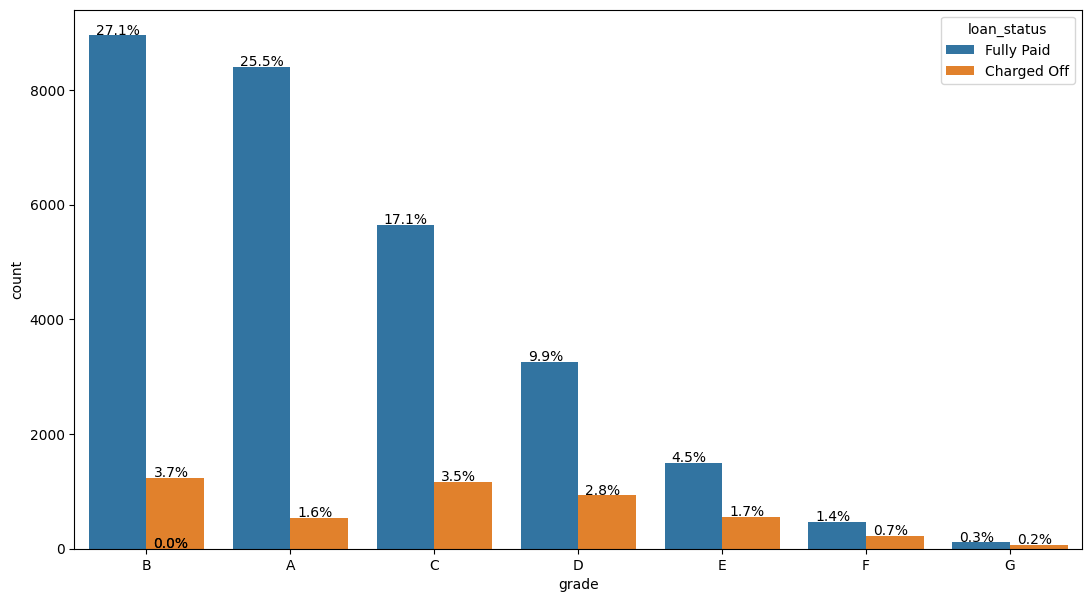

In [556]:
# Overall ratio of Charge Offs against the total
series_plt(data, 'grade', 'loan_status')

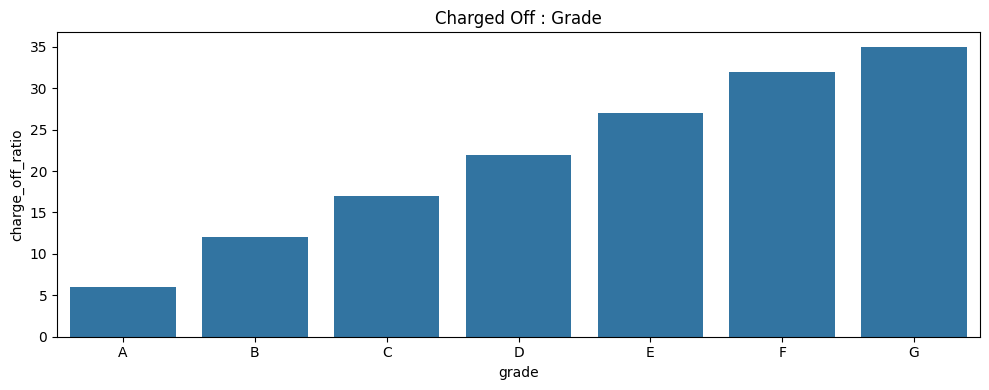

loan_status grade  Charged Off  Fully Paid  total  charge_off_ratio
0               A          531        8401   8932               6.0
1               B         1234        8948  10182              12.0
2               C         1160        5643   6803              17.0
3               D          928        3256   4184              22.0
4               E          552        1492   2044              27.0
5               F          217         460    677              32.0
6               G           60         110    170              35.0

In [557]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(data, 'grade')

***
- The Majority of *loan volume is in grade=B*
- If we analyse the Charge Off Ratio within a category
    - The highest percentage of **Charge Off**s are in the *grade=G*
    - Highest cluster of **Charge Off**s are in the grades G,F (> 30%)
    - The volume of Grade G is extremely low 158 thus it does not contribute to overall risk significantly
- **Inferences**
    - Highest risk of charge off's are in the grades of B and C
    - Grade "F" and "G" have very high chances of charged off. The columes are low
    - Grade "A" has very less chances of charged off.
    - Probablity of charged off is increasing from "A" to "G"
***

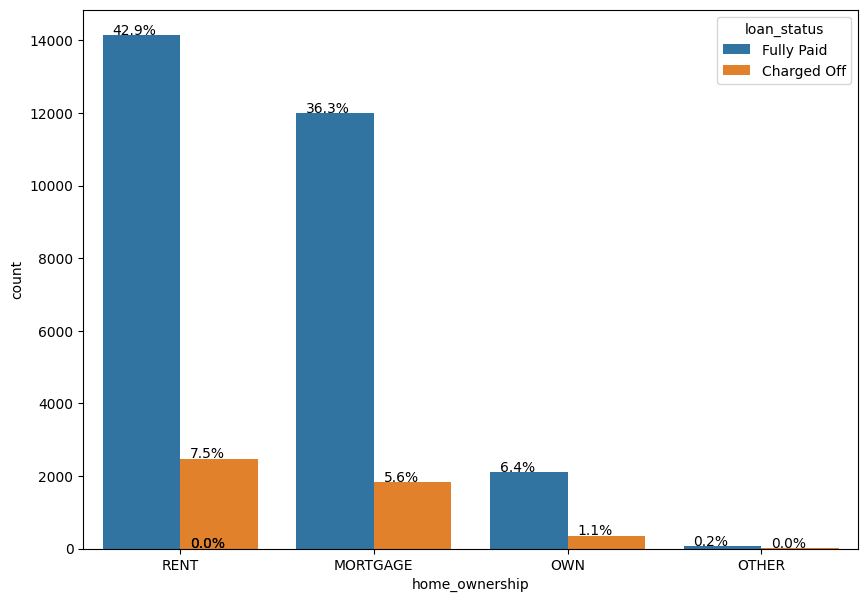

In [558]:
# Overall ratio of Charge Offs against the total
series_plt(data, 'home_ownership', 'loan_status')

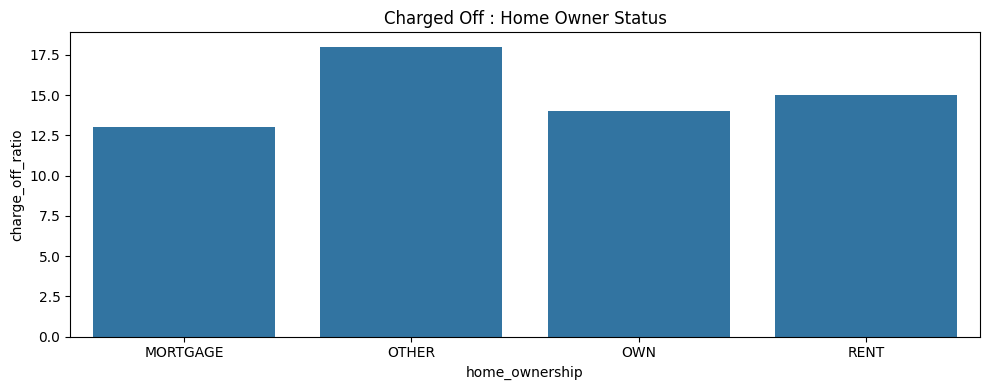

loan_status home_ownership  Charged Off  Fully Paid  total  charge_off_ratio
0                 MORTGAGE         1834       11988  13822              13.0
1                    OTHER           16          75     91              18.0
2                      OWN          352        2107   2459              14.0
3                     RENT         2480       14140  16620              15.0

In [559]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(data, 'home_ownership') 

***
- Overall highest Charge Off numbers are in the category of RENT and MORTGAGE
- Within each home_ownership category the ratio of Charge Off's for Other is higher
- **Conclusions**
    - The home_ownership status of MORTGAGE and are at the highest risk of Charge Offs
    - MORTGAGE status also has the highest range of loan amounts increasing the risk
***

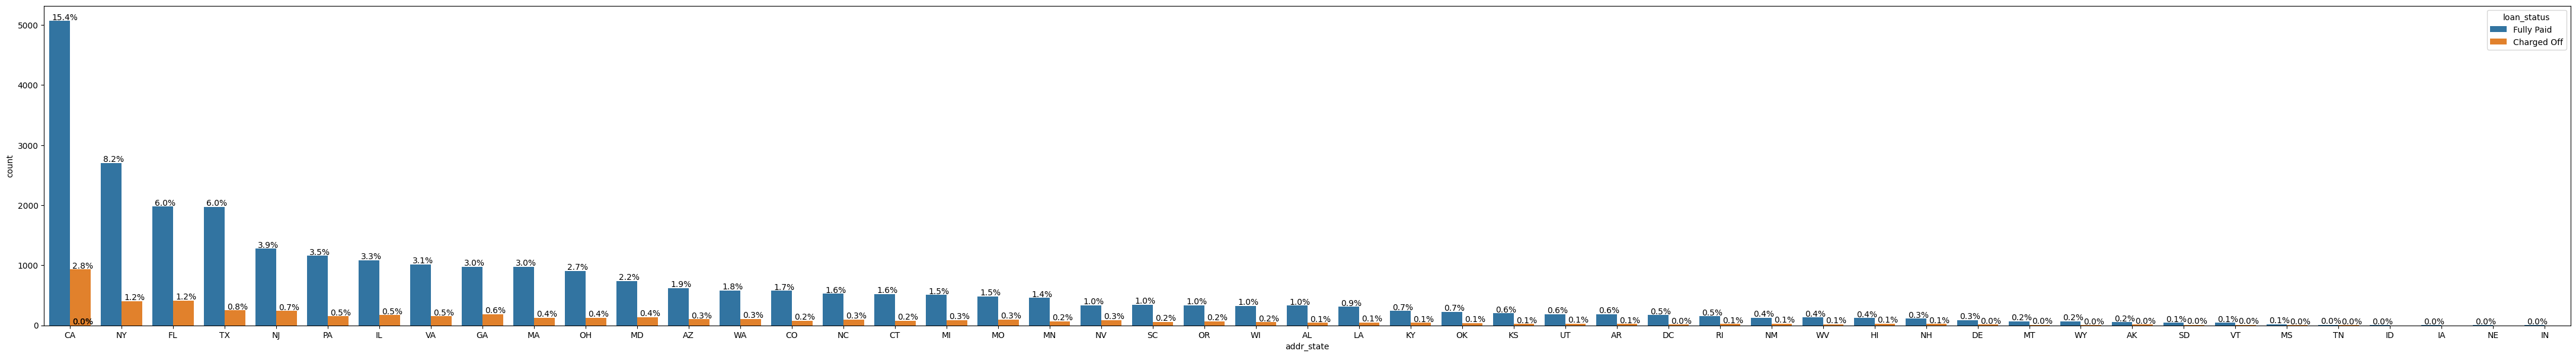

In [560]:
# Overall ratio of Charge Offs against the total
series_plt(data, 'addr_state', 'loan_status')

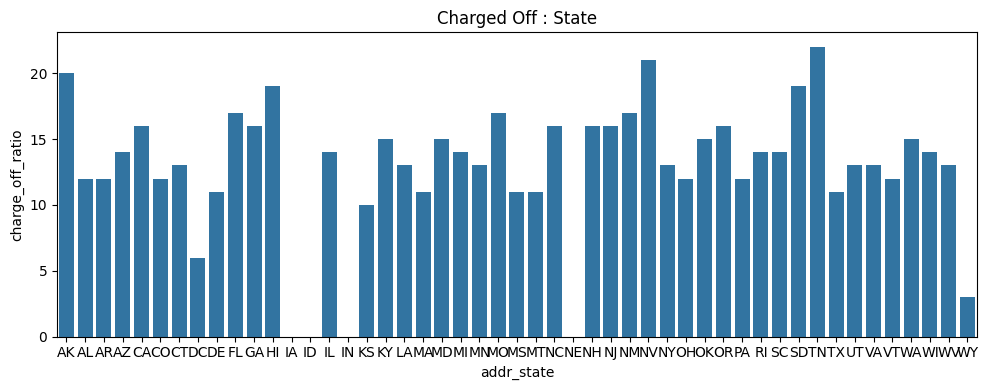

loan_status addr_state  Charged Off  Fully Paid   total  charge_off_ratio
0                   AK         13.0        51.0    64.0              20.0
1                   AL         44.0       328.0   372.0              12.0
2                   AR         24.0       184.0   208.0              12.0
3                   AZ        101.0       620.0   721.0              14.0
4                   CA        932.0      5067.0  5999.0              16.0
5                   CO         76.0       574.0   650.0              12.0
6                   CT         79.0       518.0   597.0              13.0
7                   DC         11.0       170.0   181.0               6.0
8                   DE         11.0        88.0    99.0              11.0
9                   FL        410.0      1977.0  2387.0              17.0
10                  GA        183.0       974.0  1157.0              16.0
11                  HI         28.0       120.0   148.0              19.0
12                  IA          NaN         1.0     NaN               NaN
13                  ID          NaN         4.0     NaN               NaN
14                  IL        172.0      1086.0  1258.0              14.0
15                  IN          NaN         1.0     NaN               NaN
16                  KS         21.0       200.0   221.0              10.0
17                  KY         42.0       238.0   280.0              15.0
18                  LA         47.0       310.0   357.0              13.0
19                  MA        126.0       974.0  1100.0              11.0
20                  MD        133.0       737.0   870.0              15.0
21                  MI         85.0       508.0   593.0              14.0
22                  MN         69.0       456.0   525.0              13.0
23                  MO         99.0       481.0   580.0              17.0
24                  MS          2.0        17.0    19.0              11.0
25                  MT          8.0        65.0    73.0              11.0
26                  NC         97.0       526.0   623.0              16.0
27                  NE          NaN         1.0     NaN               NaN
28                  NH         21.0       113.0   134.0              16.0
29                  NJ        240.0      1278.0  1518.0              16.0
30                  NM         27.0       129.0   156.0              17.0
31                  NV         88.0       333.0   421.0              21.0
32                  NY        404.0      2702.0  3106.0              13.0
33                  OH        127.0       903.0  1030.0              12.0
34                  OK         38.0       223.0   261.0              15.0
35                  OR         64.0       333.0   397.0              16.0
36                  PA        151.0      1159.0  1310.0              12.0
37                  RI         24.0       149.0   173.0              14.0
38                  SC         58.0       344.0   402.0              14.0
39                  SD         10.0        43.0    53.0              19.0
40                  TN          2.0         7.0     9.0              22.0
41                  TX        251.0      1970.0  2221.0              11.0
42                  UT         28.0       188.0   216.0              13.0
43                  VA        152.0      1015.0  1167.0              13.0
44                  VT          6.0        44.0    50.0              12.0
45                  WA        105.0       583.0   688.0              15.0
46                  WI         51.0       323.0   374.0              14.0
47                  WV         20.0       130.0   150.0              13.0
48                  WY          2.0        65.0    67.0               3.0

In [561]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(data, 'addr_state')

***
- Highest volume of loans is from CA and purely based on volumes the hoghest Charge Off's are from CA
- Within each state NE and NV has the highest Charge Offs
- NE has very low volume this cannot be considered
- Loan applications from NV will have high risk
- **Inferences**
    - Loan applications from NV (Neveda) have high risk of Charge Offs
    - NE has very high probablity of Charge Offs. Volume too low
    - NV,CA and FL have high percentage of Charge Off's
***

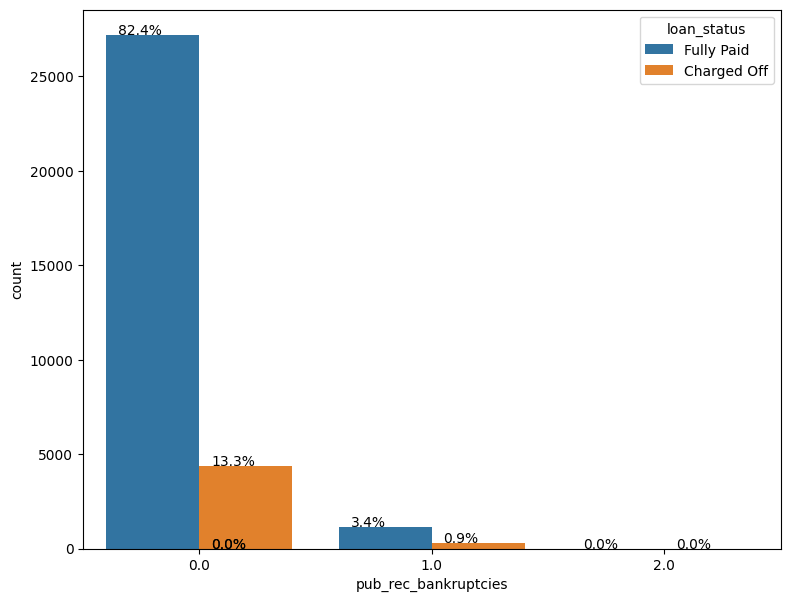

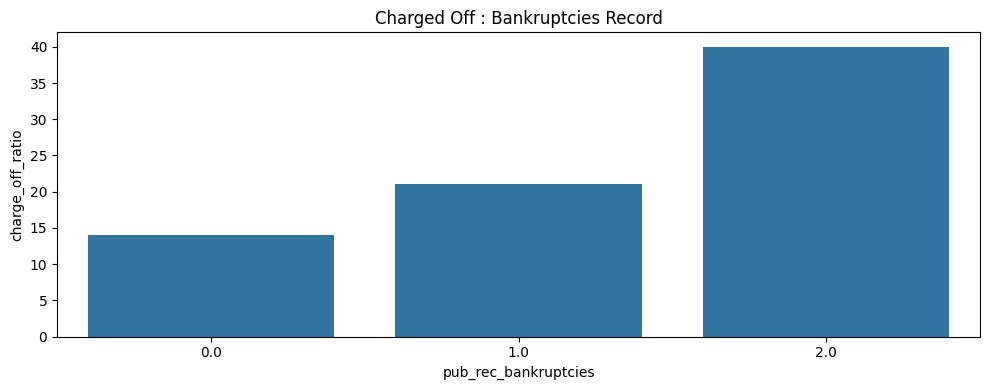

loan_status  pub_rec_bankruptcies  Charged Off  Fully Paid  total  \
0                             0.0         4376       27176  31552   
1                             1.0          304        1131   1435   
2                             2.0            2           3      5   

loan_status  charge_off_ratio  
0                        14.0  
1                        21.0  
2                        40.0

In [562]:
# Overall ratio of Charge Offs against the total
series_plt(data, 'pub_rec_bankruptcies', 'loan_status')
## The ratio of Charge Offs within the category total
ratio_wise_plot(data, 'pub_rec_bankruptcies')

***
 - Purely based on volumes the number of charge_offs are in the category of 0 (no bankruptcy record)
 - Looking at ratios within each category, customers having bankruptcy record has high charge_off ratio
 - **Conclusions**
    - Customers having bankruptcy record are at high risk of CHarge Offs
    - pub_rec_bankruptcies count 2 has even higher Charge Off ratio
***

## Bi-Variate Analysis of Derived Columns

#### Annual Income Bucket (annual_inc_b)

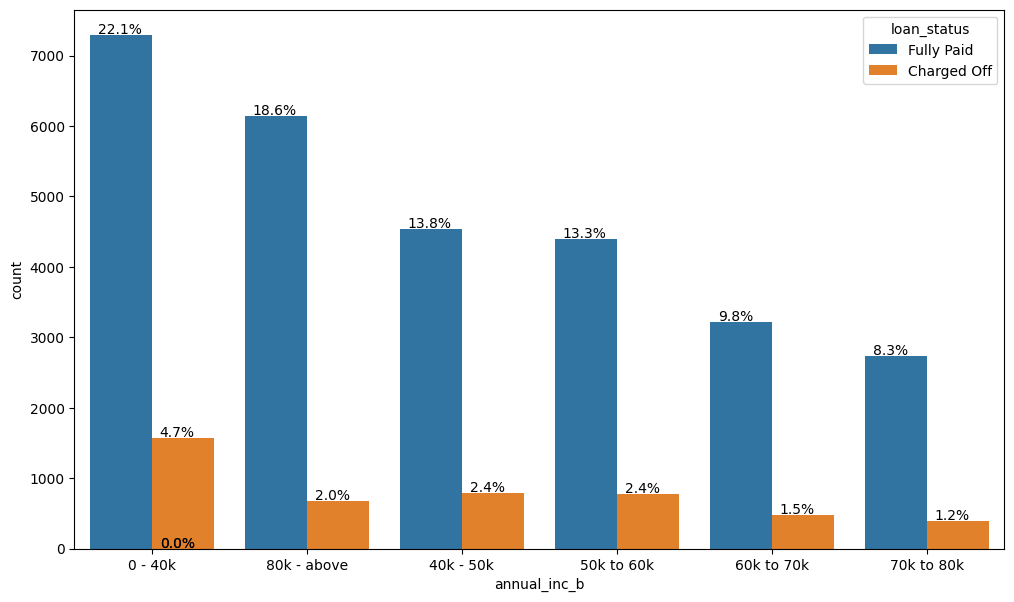

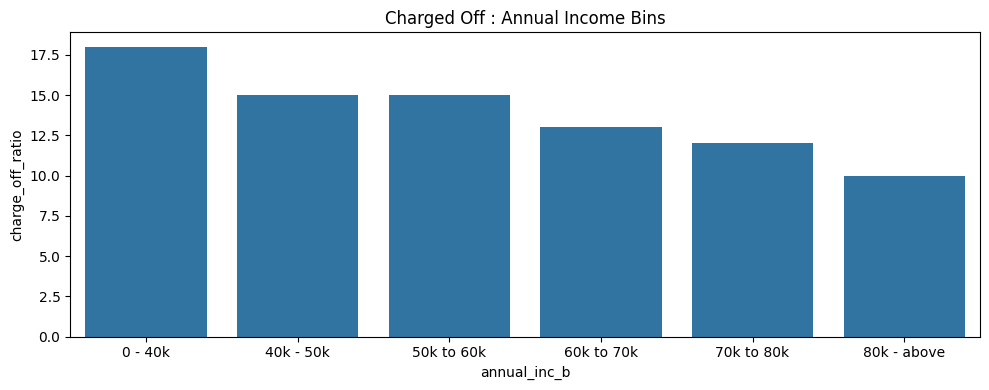

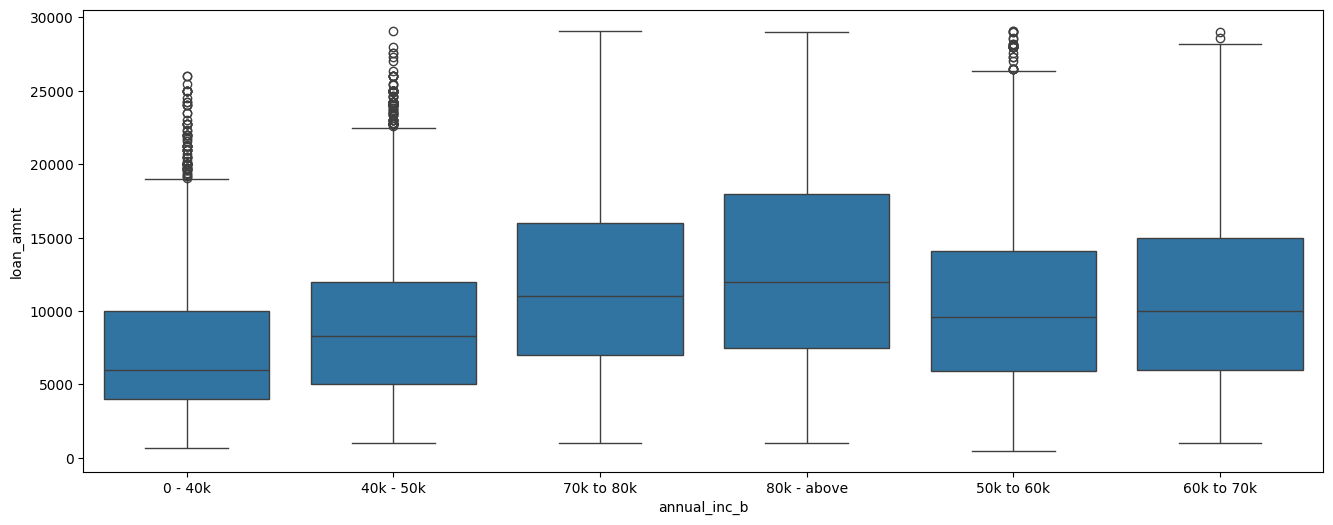

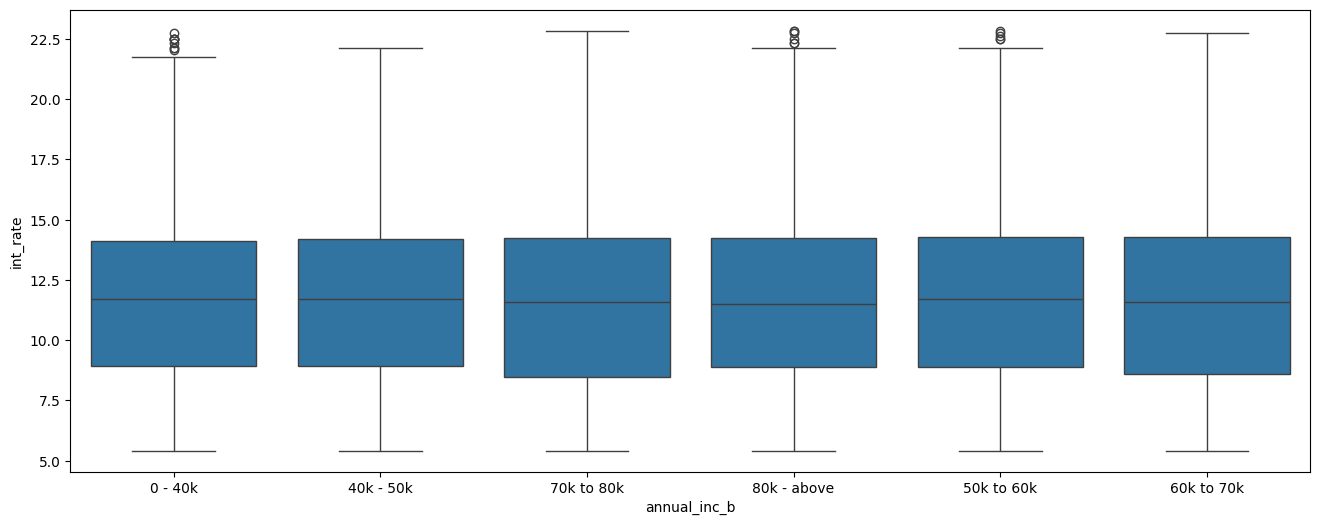

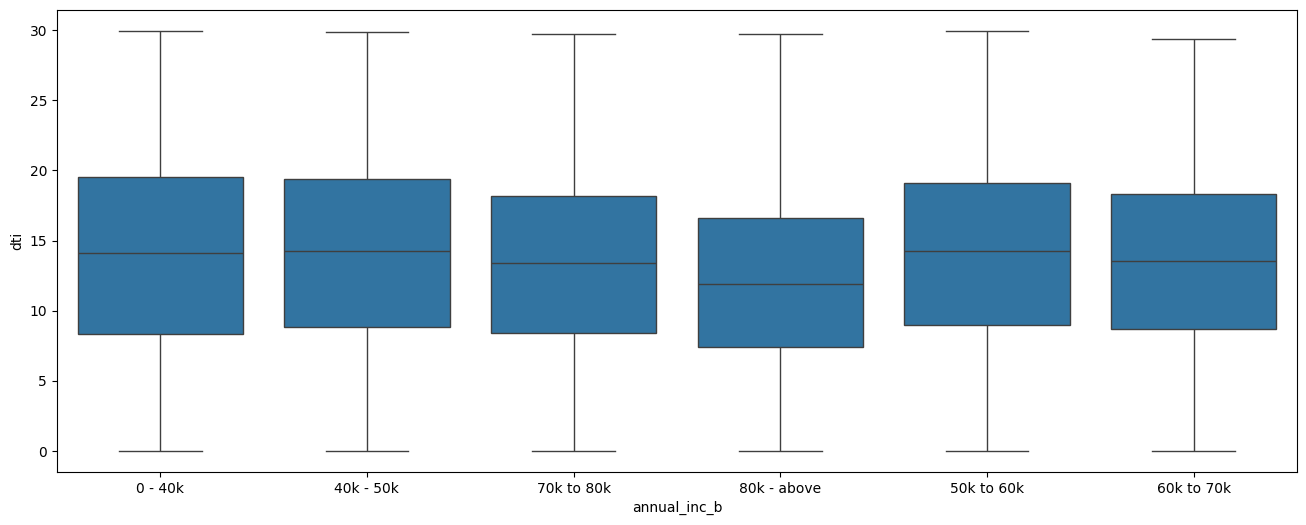

In [563]:
# Overall ratio of Charge Offs against the total
series_plt(data, 'annual_inc_b', 'loan_status')
## The ratio of Charge Offs within the category total
ratio_wise_plot(data, 'annual_inc_b')
plt.figure(figsize=(16,6))
sns.boxplot(y=data.loan_amnt,x=data.annual_inc_b)
plt.show()
plt.figure(figsize=(16,6))
sns.boxplot(y=data.int_rate,x=data.annual_inc_b)
plt.show()
plt.figure(figsize=(16,6))
sns.boxplot(y=data.dti,x=data.annual_inc_b)
plt.show()

***
- Annual income range of 0-40K has the highest charge offs
- Charge off ratio within the bucket of 0-40K have highest Charge Offs
- **Conclusions**
    - Income range of 0-40K have the highest risk
    - Income range 80000+  has less chances of charged off.
    - Increase in annual income charged off proportion decreases. 
***

### Loan Amount vs Annual Income for Charged Off

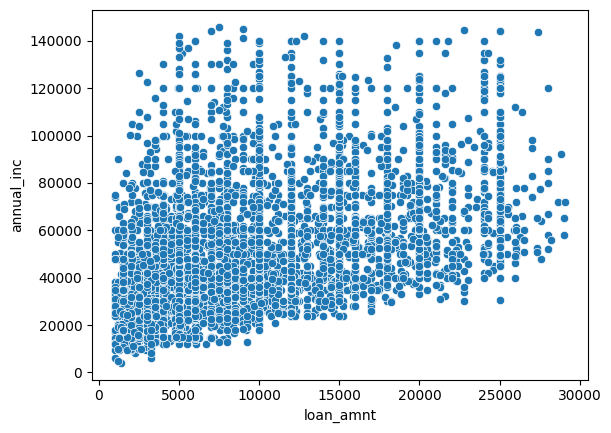

In [564]:
sns.scatterplot(x = charged_off_df["loan_amnt"], y = charged_off_df["annual_inc"])
plt.show()

### Insights
Very high density of low income and low loan amount. Reason for this needs to be understood with other variables.

**Conclusion:**
- Avoid issuing low loan amounts to low income customer.

### Loan Amount Bucket (loan_amnt_b)

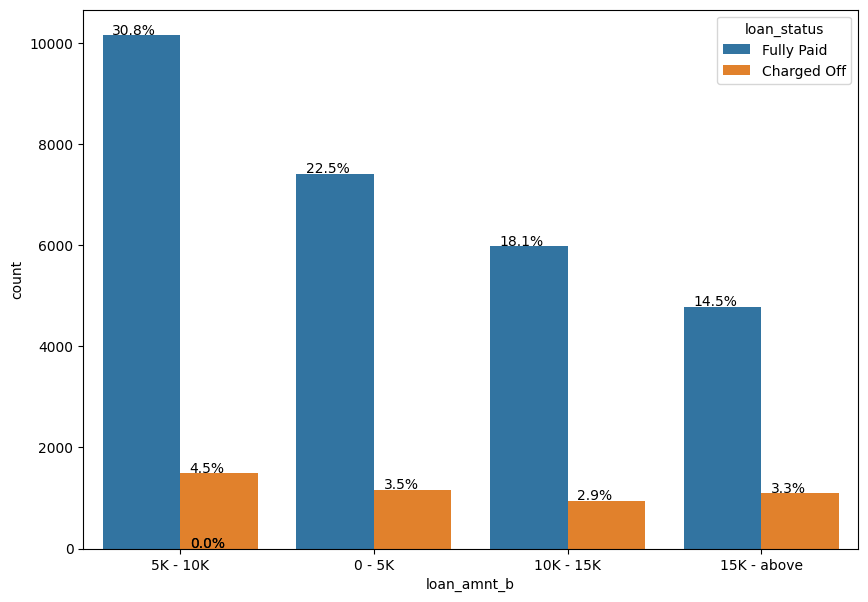

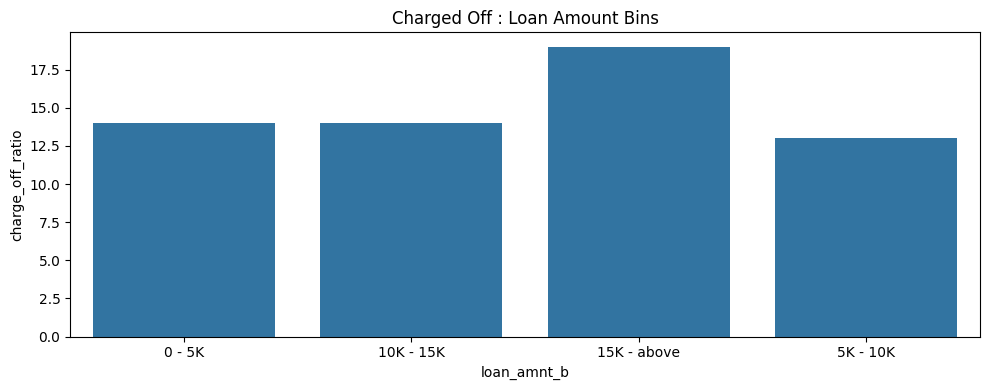

loan_status  loan_amnt_b  Charged Off  Fully Paid  total  charge_off_ratio
0                 0 - 5K         1161        7412   8573              14.0
1              10K - 15K          942        5976   6918              14.0
2            15K - above         1092        4774   5866              19.0
3               5K - 10K         1487       10148  11635              13.0

In [565]:
# Overall ratio of Charge Offs against the total
series_plt(data, 'loan_amnt_b', 'loan_status')
## The ratio of Charge Offs within the category total
ratio_wise_plot(data, 'loan_amnt_b')

***
- Based on volume highest percentage of Charge Offs are in the category of 5K to 10k of loan_ammount
- The Charge Off ratio of all the customer;s within the loan_amount of 15K and above is at the highest CHarge Off risk
- **Inferences**
    - Charge Off risk of loan amount 15K and above is at the highest risk
***

## BiVariate Analysis using Box Plots

### Numerical vs Categorical

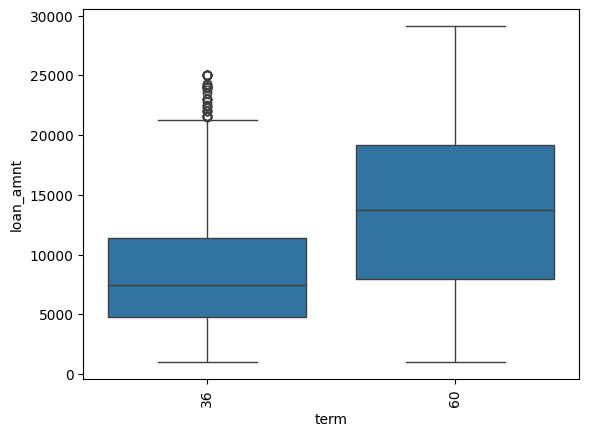

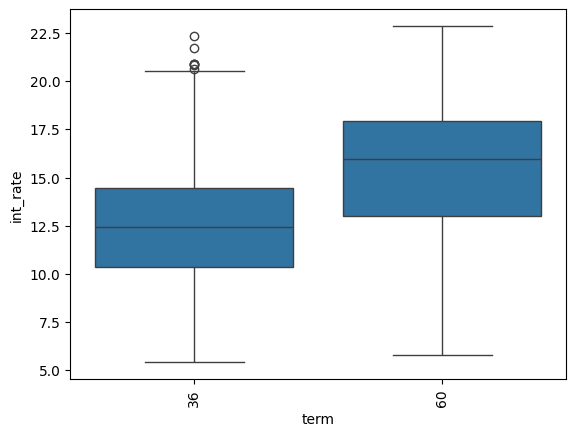

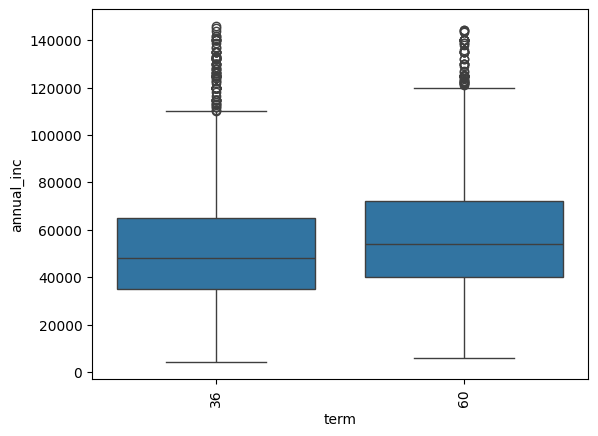

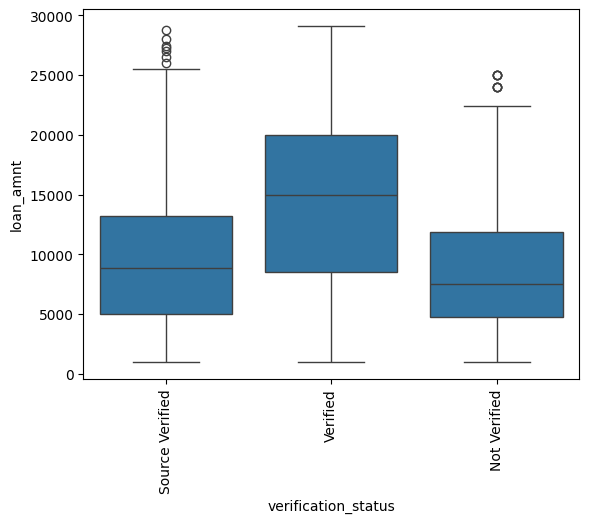

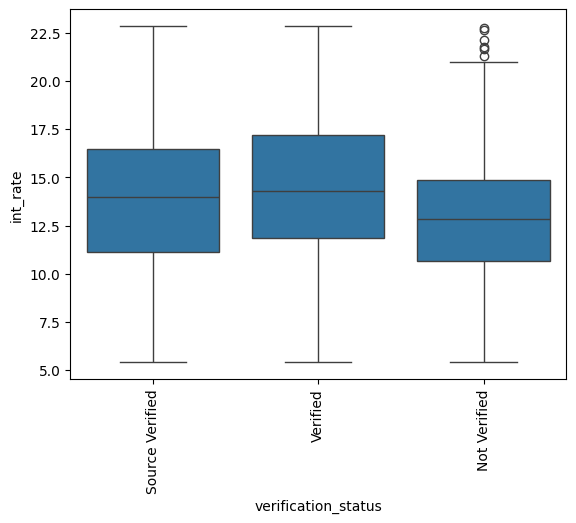

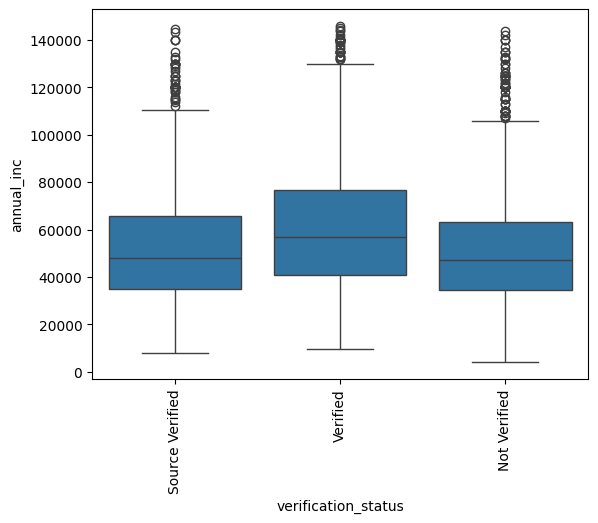

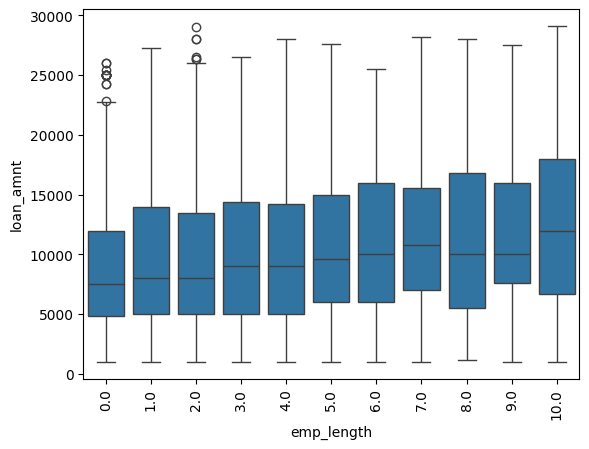

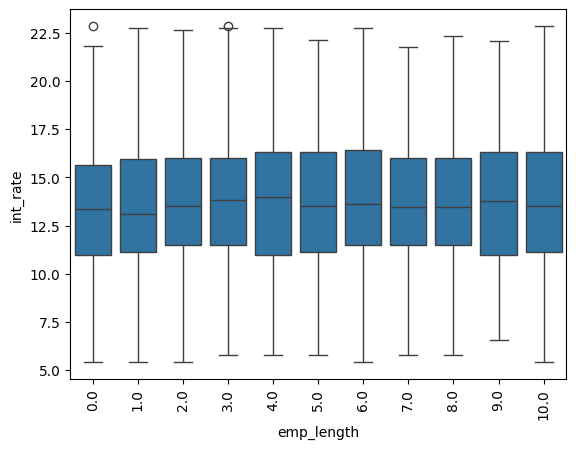

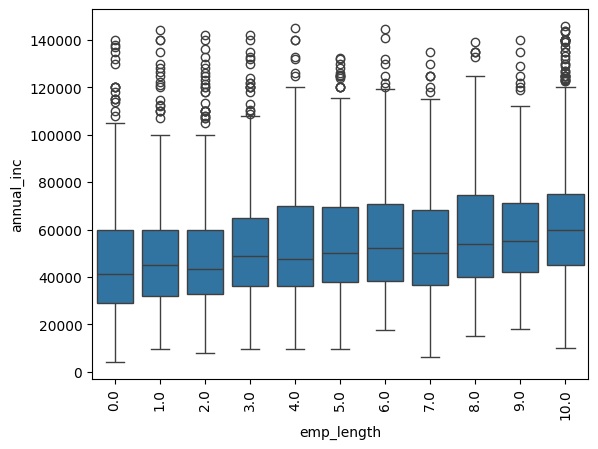

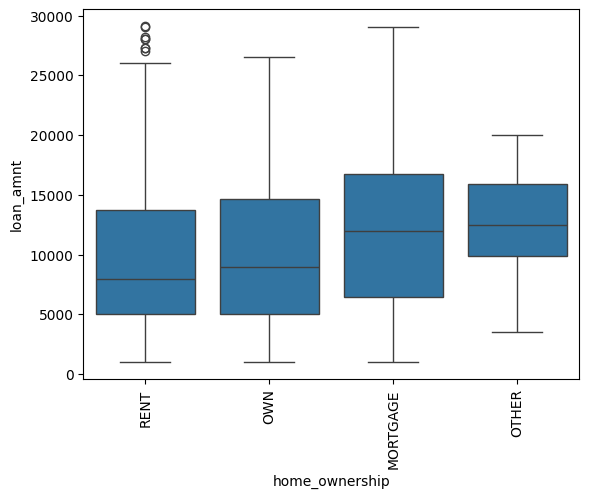

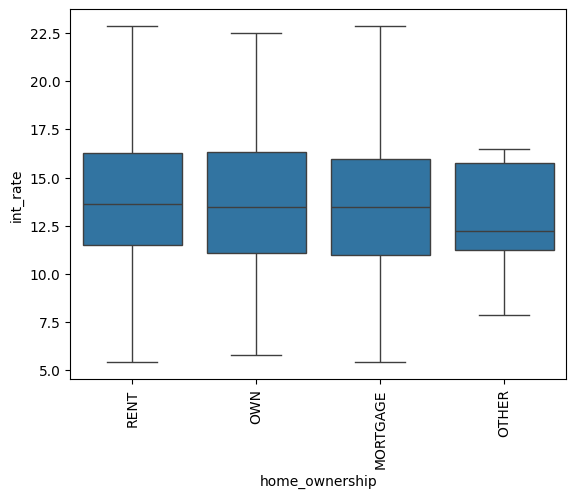

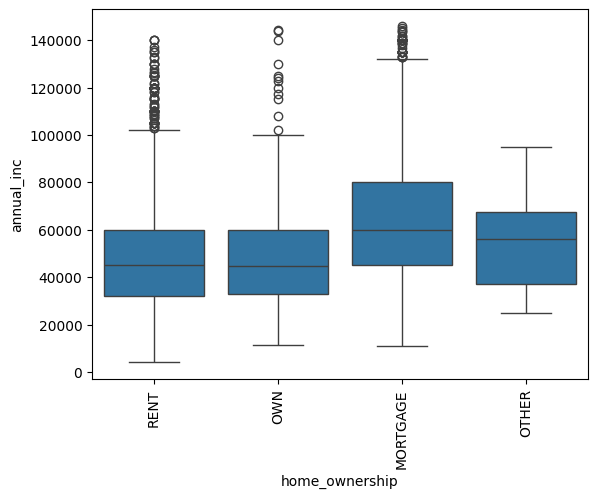

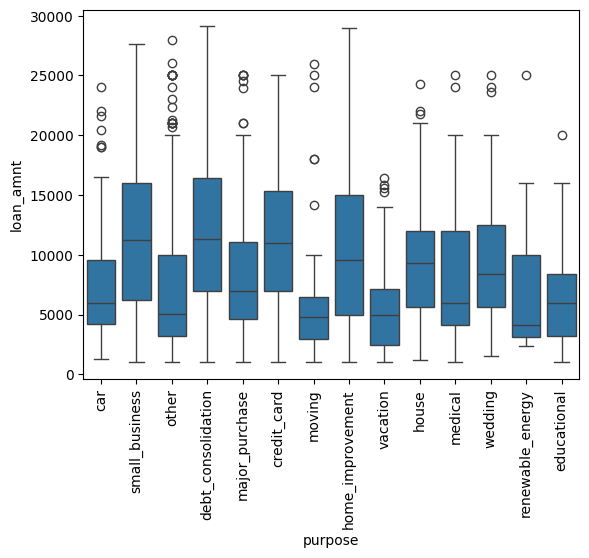

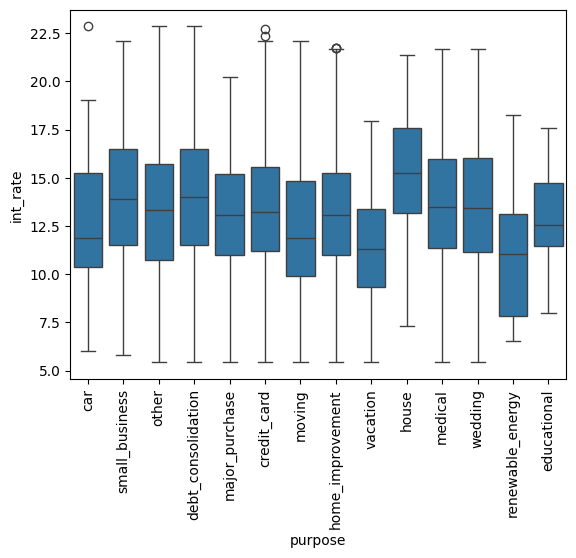

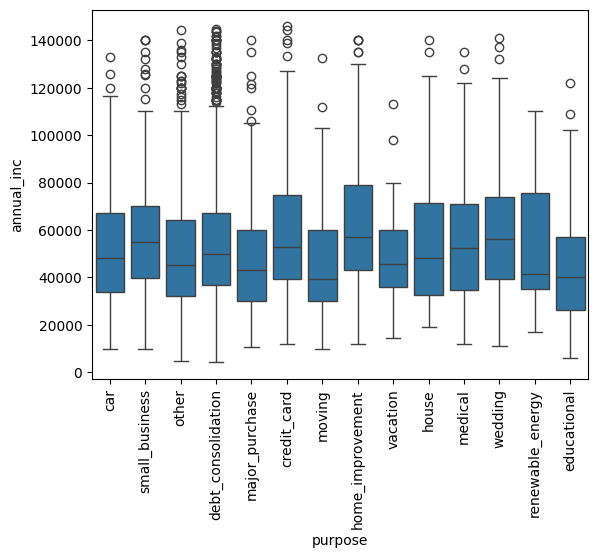

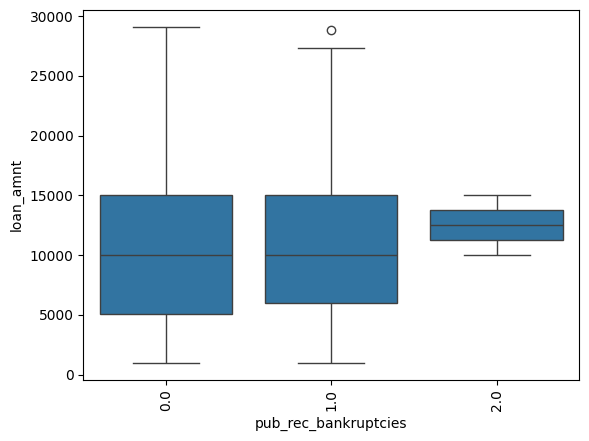

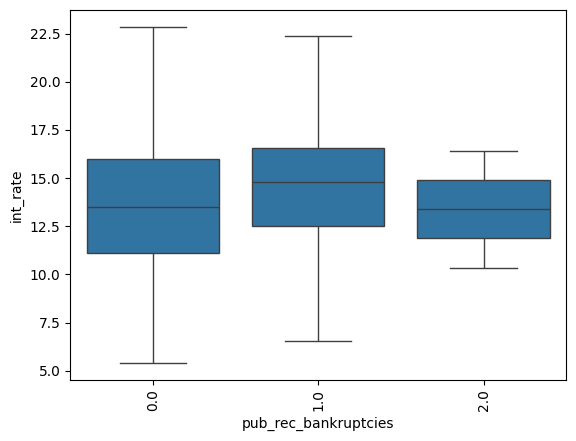

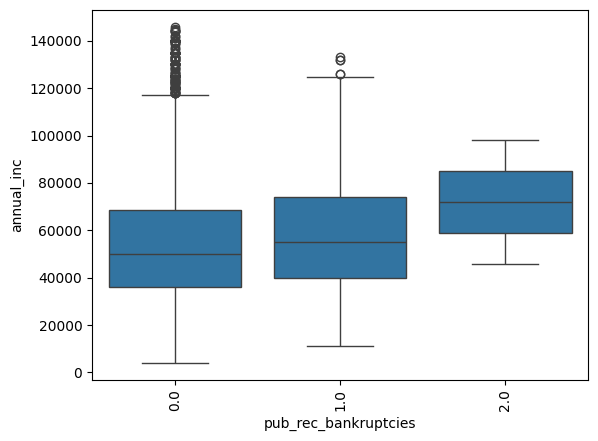

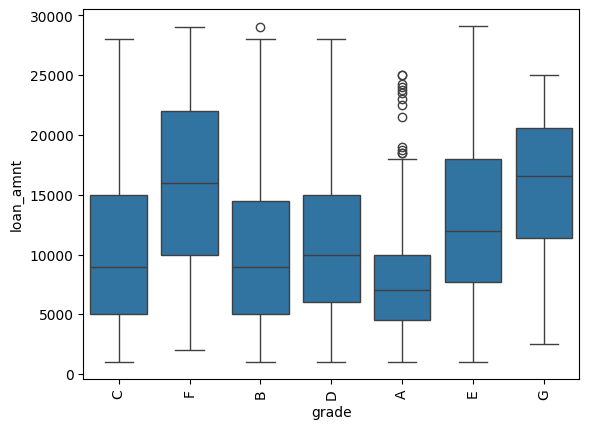

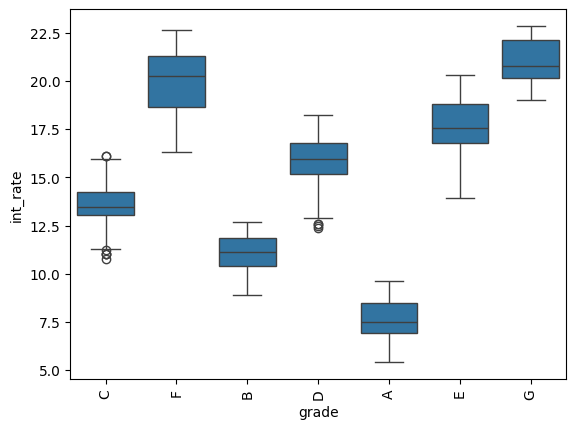

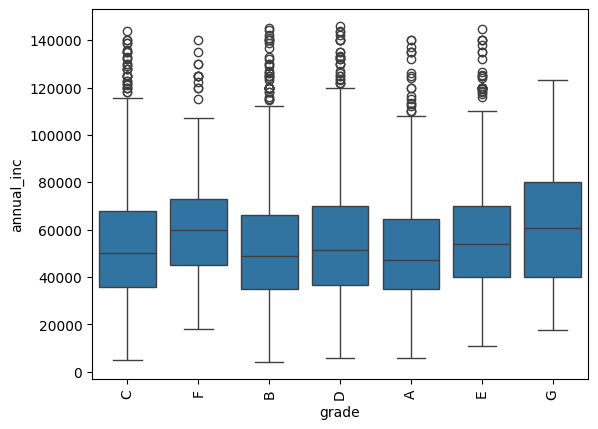

In [566]:
categorical_cols = ['term', 'verification_status', 'emp_length','home_ownership', 'purpose', 'pub_rec_bankruptcies', 'grade']

numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc']

for c_col in categorical_cols:
    for n_col in numerical_cols:
        plt.xticks(rotation = 90)
        sns.boxplot(x = charged_off_df[c_col], y = charged_off_df[n_col])
        plt.show()

### Insights
For all defaulters:
- 60 term have issued very high loan amounts compared to 36 term. While annual income of both categories is almost similar.
- As employment duration increases, median for default loan amount also increases, despite the interest rate being quite similar for all.
- Strange to see median annual income for employment duration 0-10 increases very gradually for defaulters.
- Median Interest rate for Home Owner with “Other” is very low while their Loan Default Amount is higher than others.
- Defaults median of Loan Amount, Interest rate, and Annual Income for the purpose of “Renewable Energy” is very low.
- Interest Rates for Grade E, F, G are very high making loan defaults higher while having similar annual income.

**Conclusion:**
- Do not issue loans for 60 term when income is similar to 36 term.
- Do not issue loans to customers with higher employment duration yet having lower income (less than 6).
- Increase interest rates for Home Owner with “Other” category.
- Do not issue E, F, G loans for customers having income less than 6.

### Numerical vs Numerical

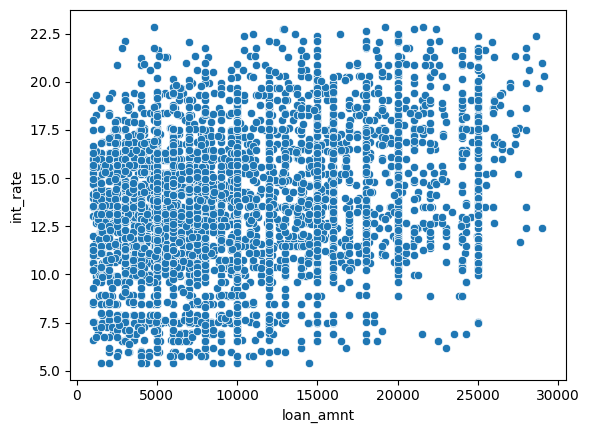

In [567]:
# This plot is used to check if two columns have positive/negative or no relationship
#
sns.scatterplot(x = charged_off_df["loan_amnt"], y = charged_off_df["int_rate"])
plt.show()

### Insights
The density of defaulters is high when loan amount is between 2k-7k with interest rates ranging from 11-15%.

**Conclusion**
- For smaller loan amounts interest rates should be kept very high to avoid defaults.

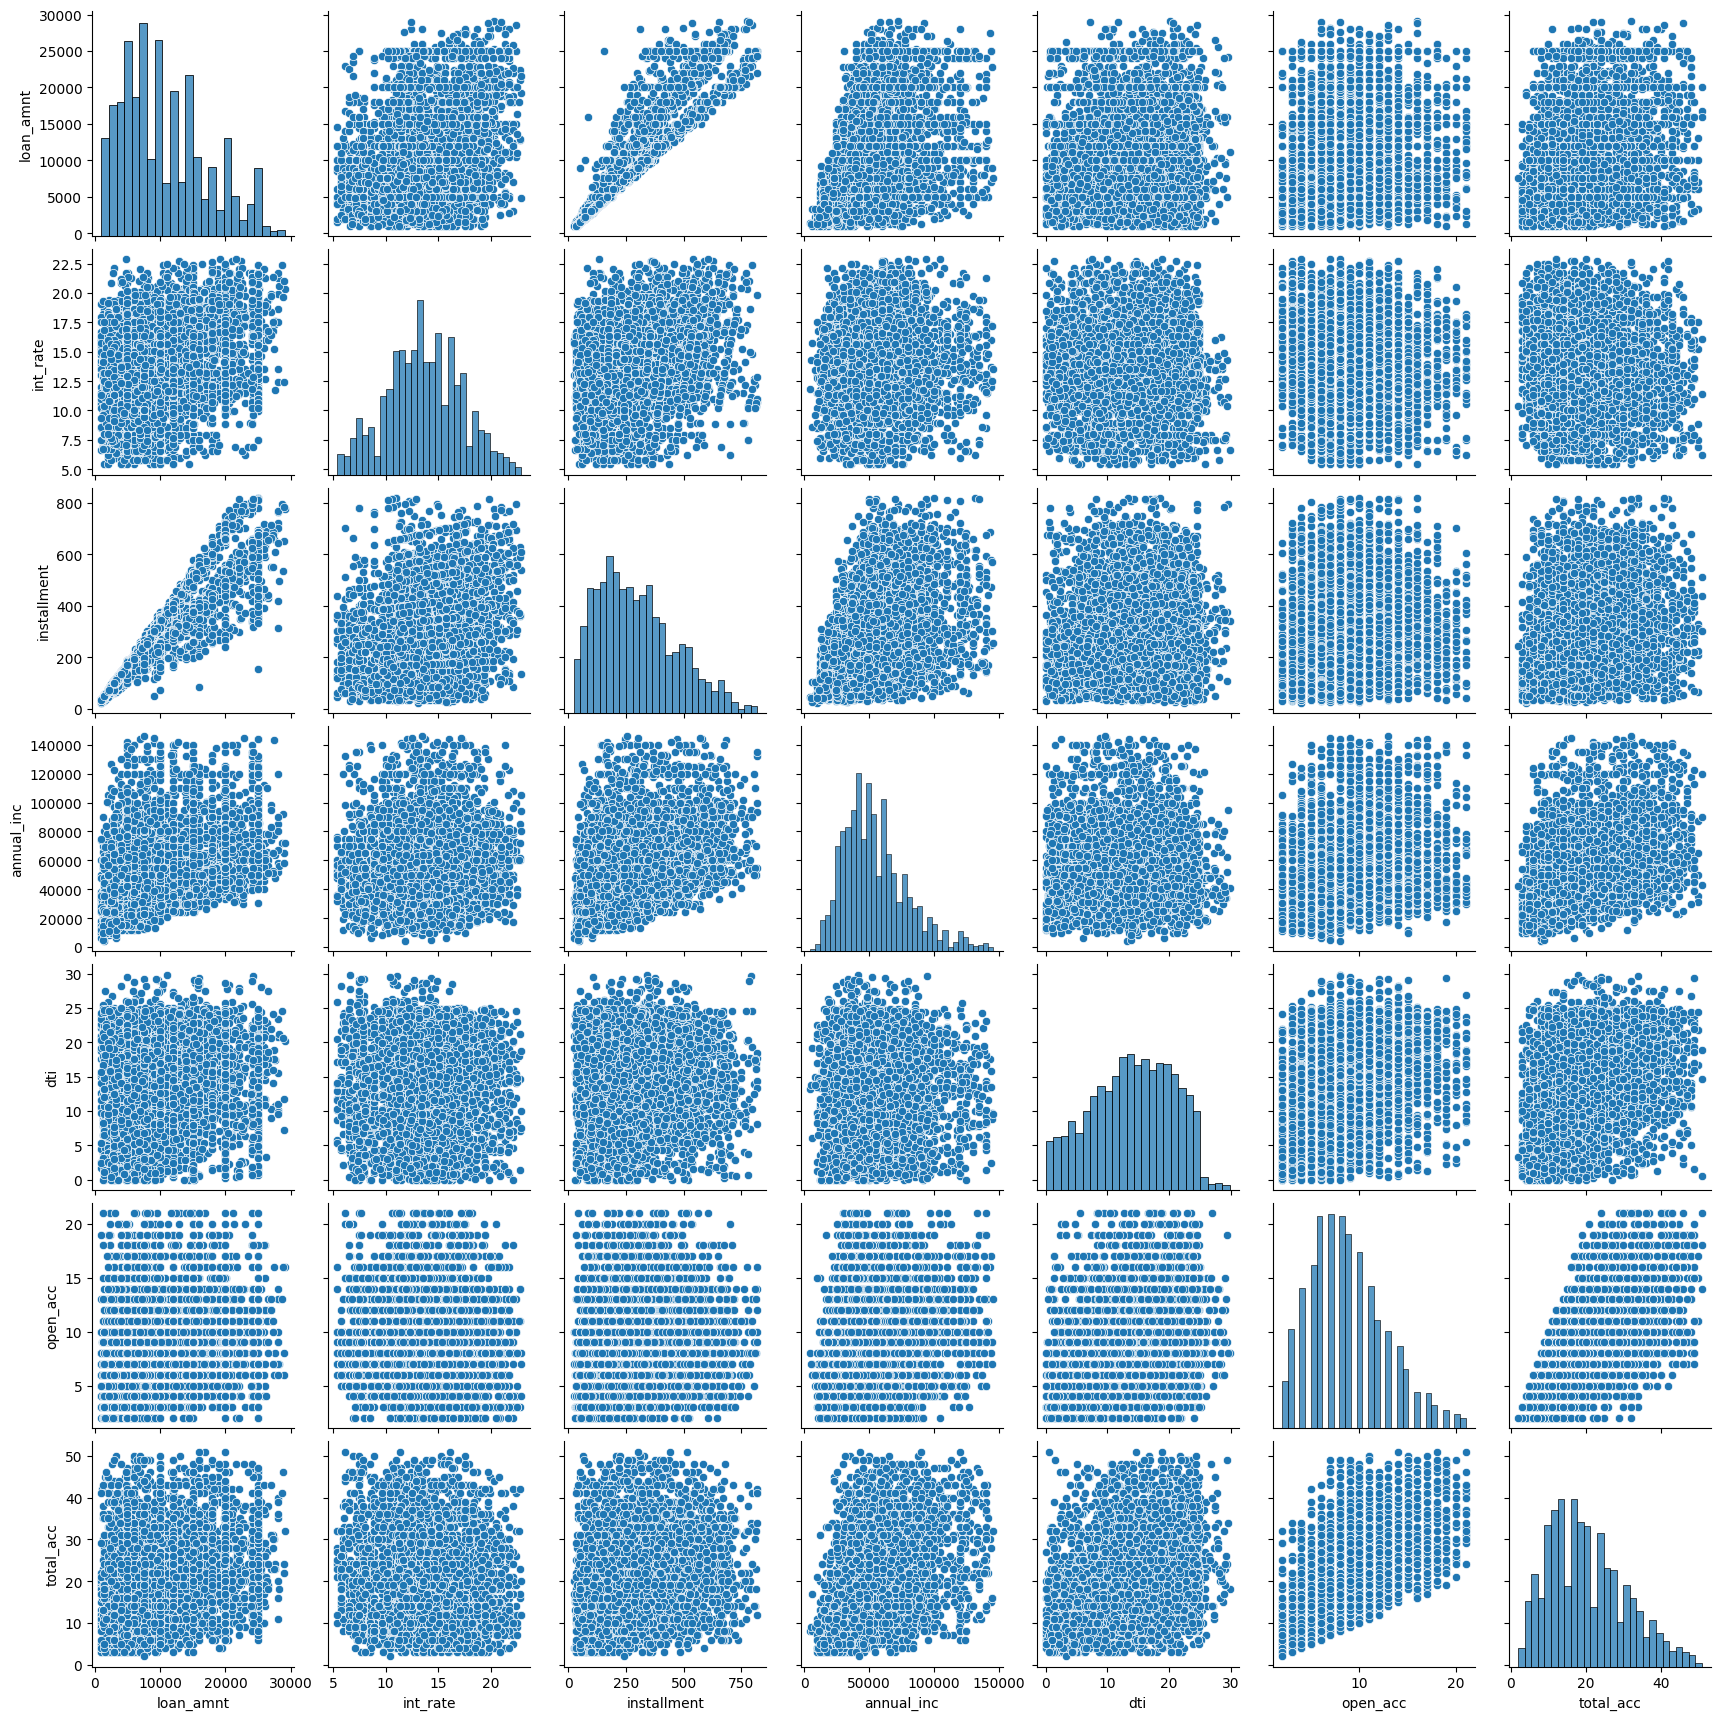

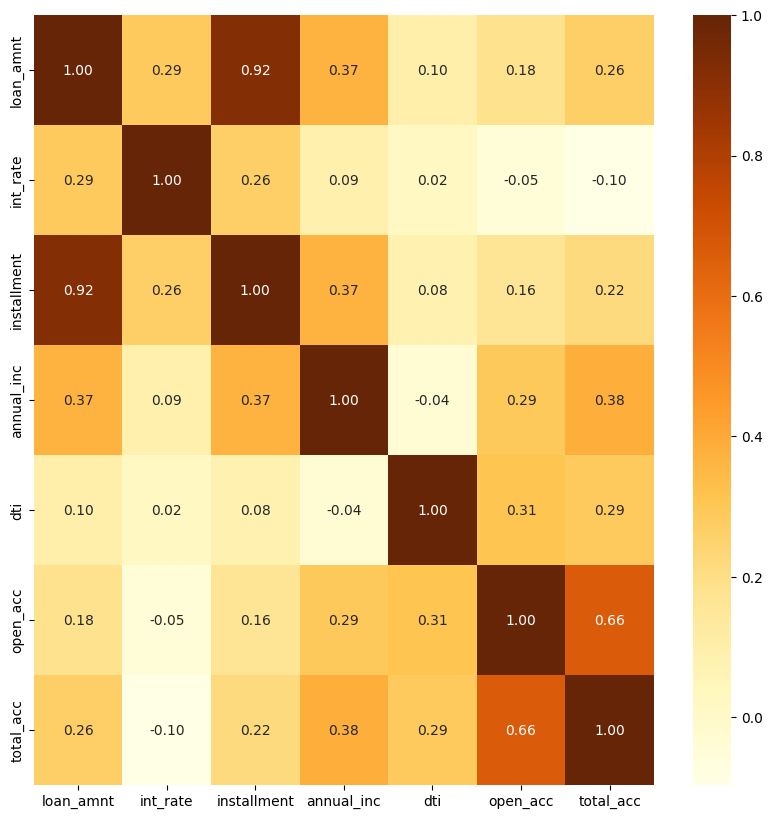

In [568]:
numerical_cols = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'total_acc'
]

sns.pairplot(charged_off_df[numerical_cols])
plt.show()
numerical_df = charged_off_df[numerical_cols]

plt.figure(figsize = (10, 10))

sns.heatmap(numerical_df.corr(), annot = True, fmt = '.2f', cmap = "YlOrBr")
plt.show()

### Insights
For all defaulters,
- Loan amount and Interest rate have correlation of only 0.29 which suggests interest rate can be increased for higher loan amounts.
- Annual income and Loan Amount have 0.37 correlation. So give higher loans only for very high annual income customers.

### Categorical vs Categorical

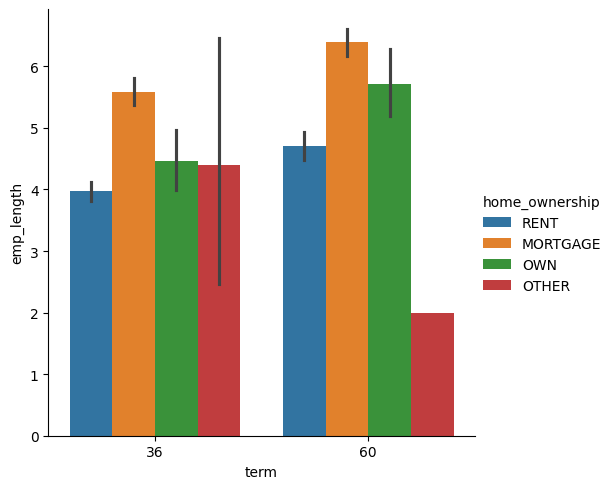

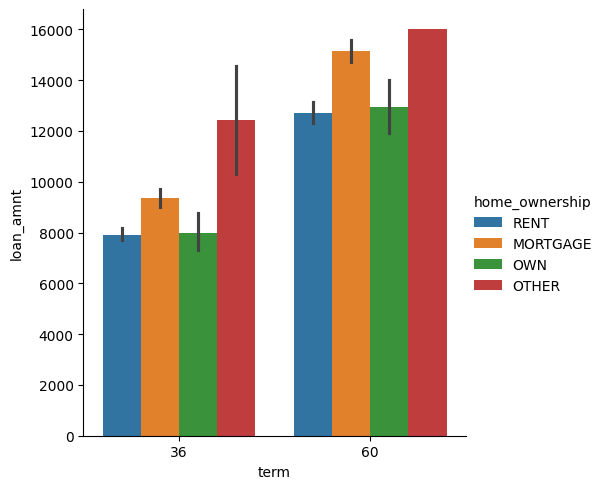

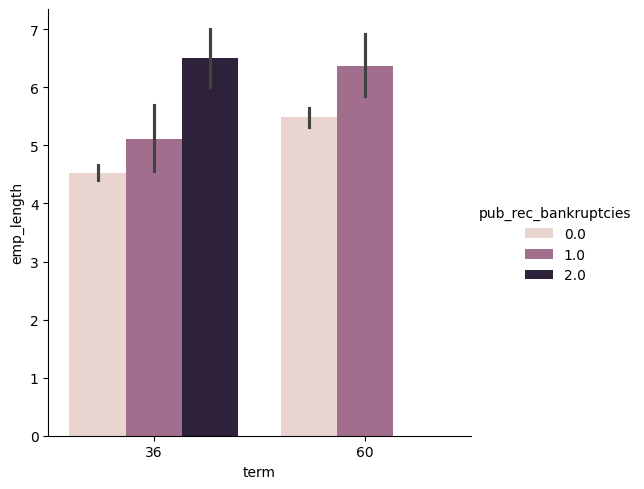

In [569]:
categorical_cols = ['term', 'verification_status', 'emp_length',
    'home_ownership', 'purpose', 'pub_rec_bankruptcies', 'grade'
]
sns.catplot(x='term', y='emp_length', hue='home_ownership', data=charged_off_df, kind='bar')
plt.show()

sns.catplot(x='term', y='loan_amnt', hue='home_ownership', data=charged_off_df, kind='bar')
plt.show()

sns.catplot(x='term', y='emp_length', hue='pub_rec_bankruptcies', data=charged_off_df, kind='bar')
plt.show()

### Insights
- For 60 Term, there are no defaulters when loan is for Home Ownership "Other" category while employment length is > 2.